In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import imageio

###Identify Data Sources
###csv files from gapminder API

In [19]:
# Read in data:
data = pd.read_csv('../data/gapminder_total.csv')

In [20]:
data

country  year  fertility  population      continent  \
0              Afghanistan  1950       7.67   7752118.0           Asia   
1                  Albania  1950       5.80   1263171.0         Europe   
2                  Algeria  1950       7.65   8872247.0         Africa   
3                   Angola  1950       6.93   4354882.0         Africa   
4      Antigua and Barbuda  1950       4.45     46301.0  North America   
...                    ...   ...        ...         ...            ...   
11083            Venezuela  2015       2.34  31108083.0  South America   
11084              Vietnam  2015       1.70  93447601.0           Asia   
11085                Yemen  2015       3.83  26832215.0           Asia   
11086               Zambia  2015       5.59  16211767.0         Africa   
11087             Zimbabwe  2015       3.35  15602751.0         Africa   

       life_expectancy  
0                26.85  
1                54.48  
2                42.77  
3                30.70  
4                57.97  
...                ...  
11083            74.80  
11084            75.40  
11085            66.00  
11086            56.70  
11087            59.30  

[11088 rows x 6 columns]

###Define Questions:
###Identify the key variables you want to explore in the scatterplot animation, such as life expectancy and population.

Read the gapminder data into a DataFrame


In [21]:

hello = data[data["year"]==2000]
hello

country  year  fertility  population      continent  \
8400          Afghanistan  2000       7.73  19701940.0           Asia   
8401              Albania  2000       2.38   3121965.0         Europe   
8402              Algeria  2000       2.51  31183658.0         Africa   
8403               Angola  2000       6.84  15058638.0         Africa   
8404  Antigua and Barbuda  2000       2.32     77648.0  North America   
...                   ...   ...        ...         ...            ...   
8563            Venezuela  2000       2.82  24481477.0  South America   
8564              Vietnam  2000       1.98  80285563.0           Asia   
8565                Yemen  2000       6.36  17795219.0           Asia   
8566               Zambia  2000       6.07  10585220.0         Africa   
8567             Zimbabwe  2000       4.07  12499981.0         Africa   

      life_expectancy  
8400             50.1  
8401             74.7  
8402             73.3  
8403             52.3  
8404             73.8  
...               ...  
8563             73.8  
8564             72.0  
8565             62.4  
8566             44.8  
8567             47.9  

[168 rows x 6 columns]

###Create a gapminder plot for a single year

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

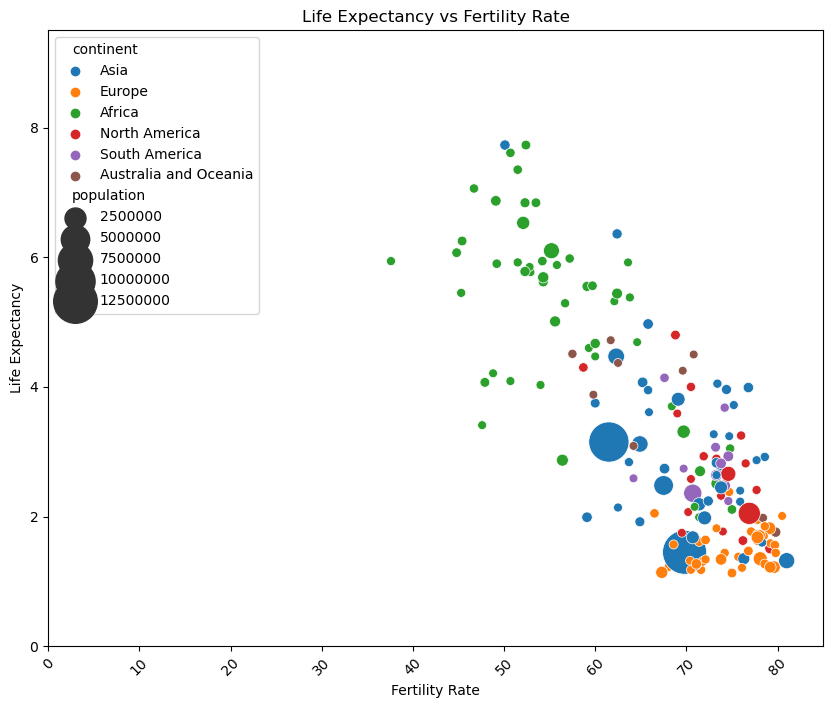

In [22]:
#for year 2000
height = 10
width = 8
christy = hello["population"]/100
plt.figure(figsize =(height,width))
sns.scatterplot(x = 'life_expectancy',y = "fertility", hue = "continent",size = christy,data = hello,sizes = (40,1000))
plt.title('Life Expectancy vs Fertility Rate')
plt.ylabel("Life Expectancy")
plt.xlabel("Fertility Rate")
plt.axis([0, 85, 0, 9.5])

plt.xticks(rotation=45)

##Create an animated graphic by combining many plots into one gif file

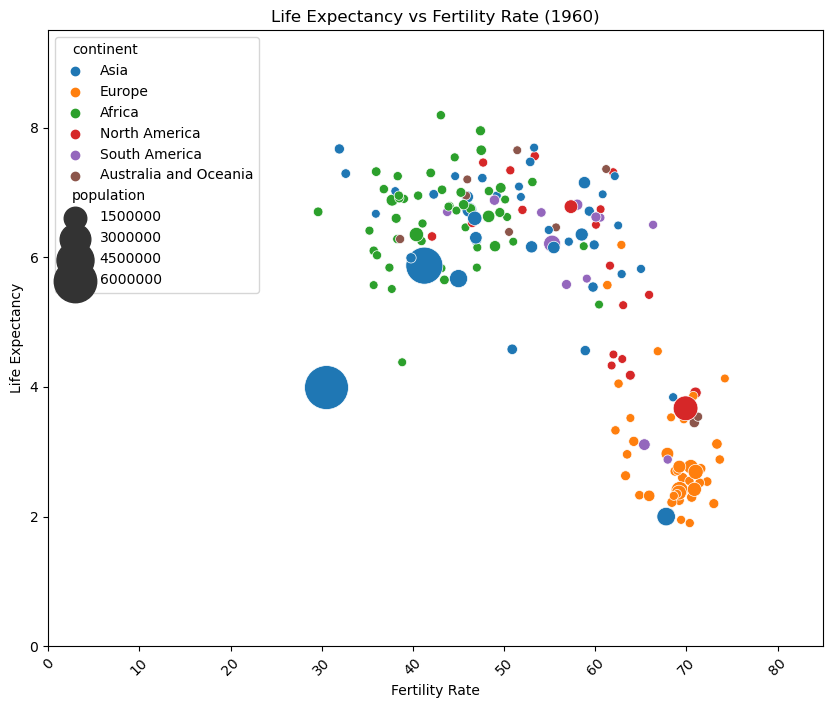

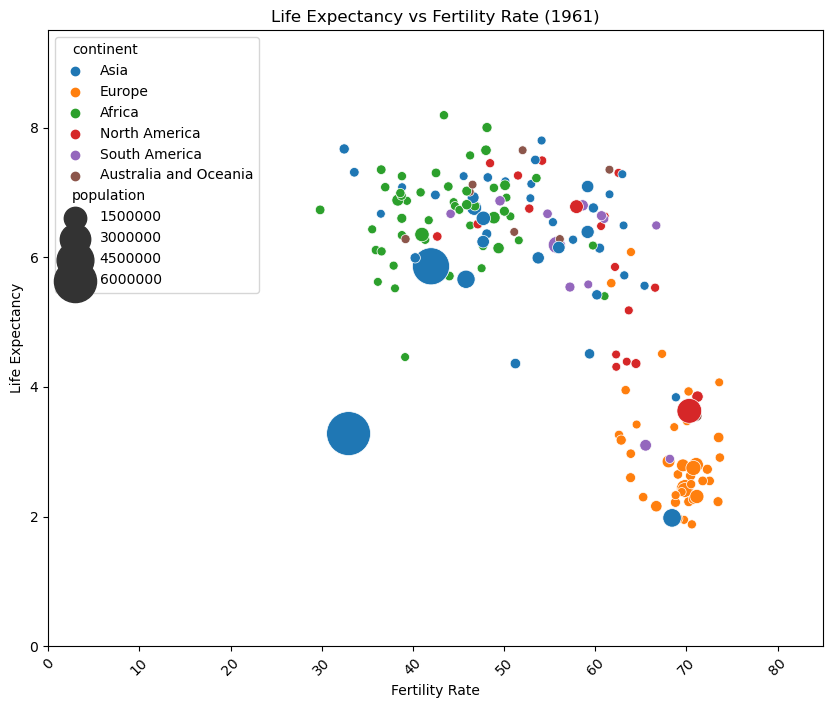

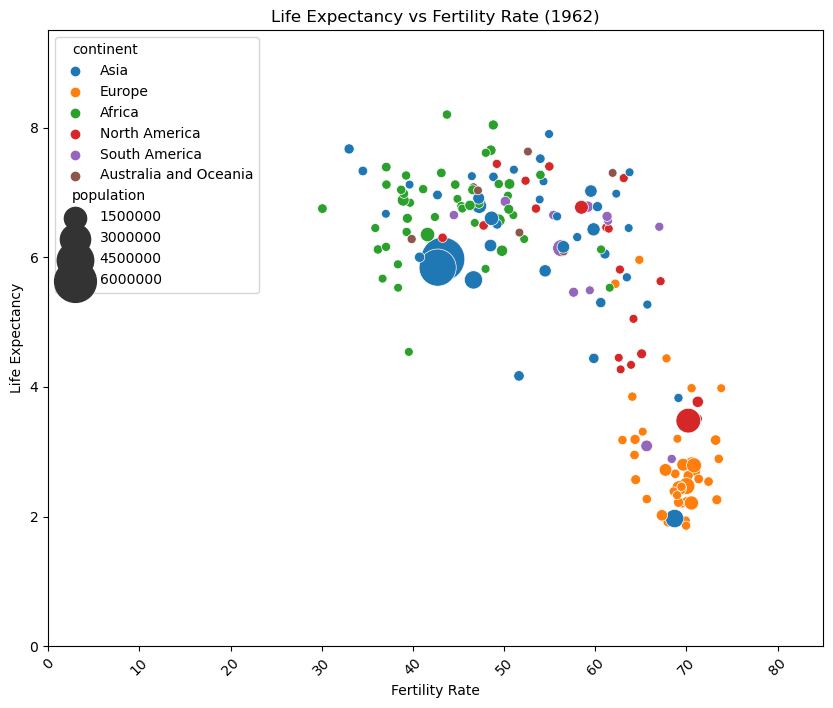

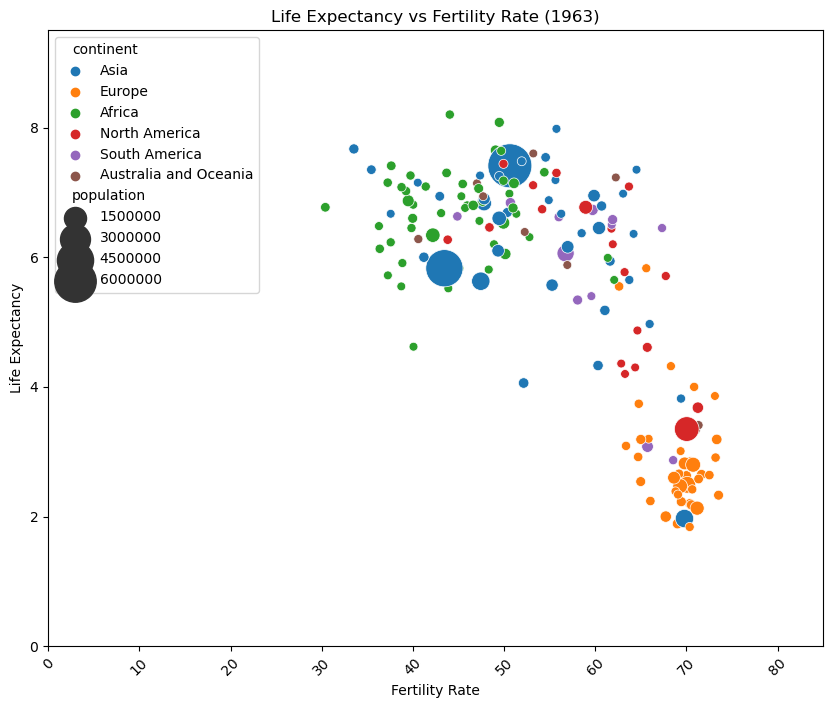

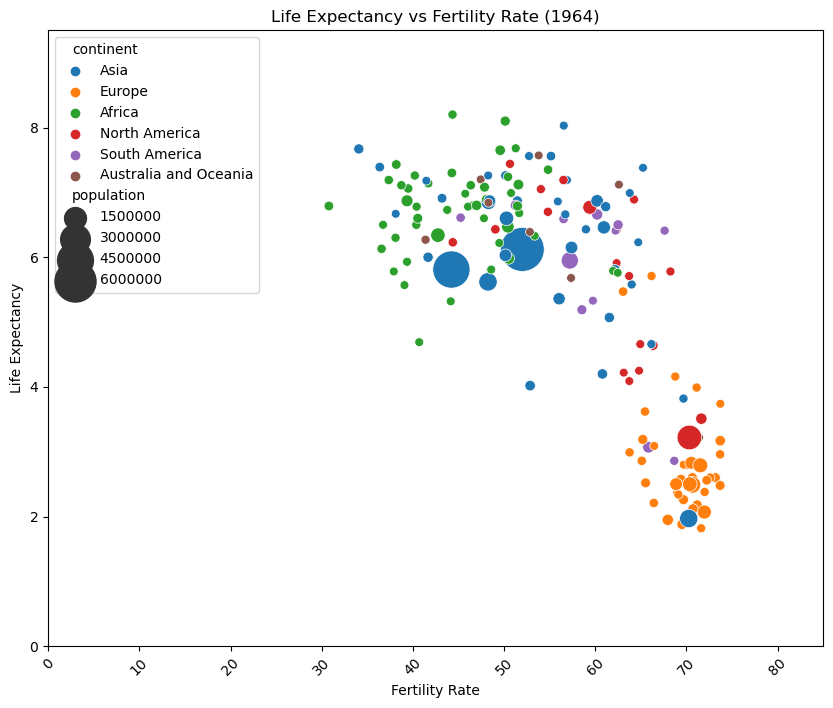

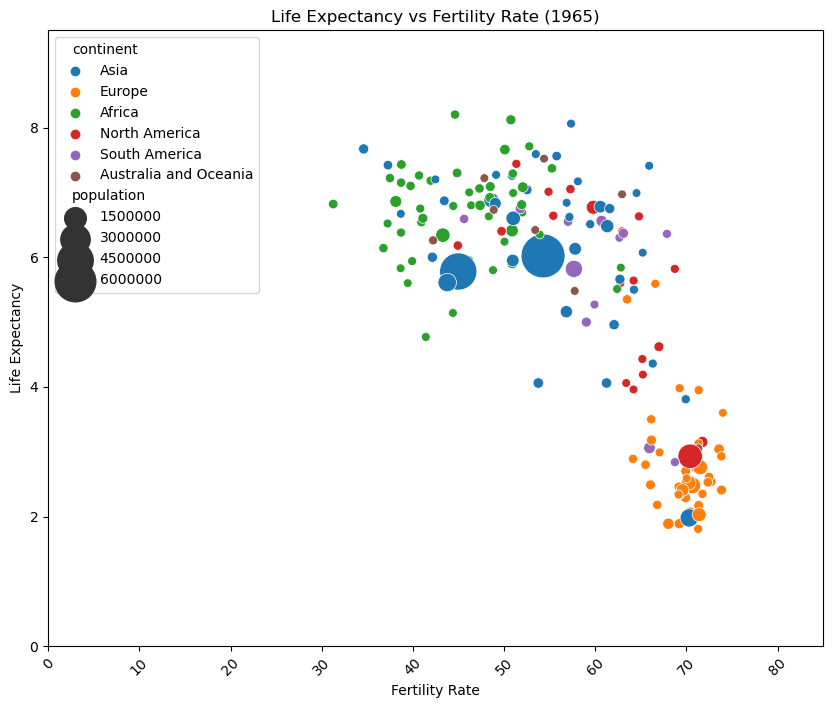

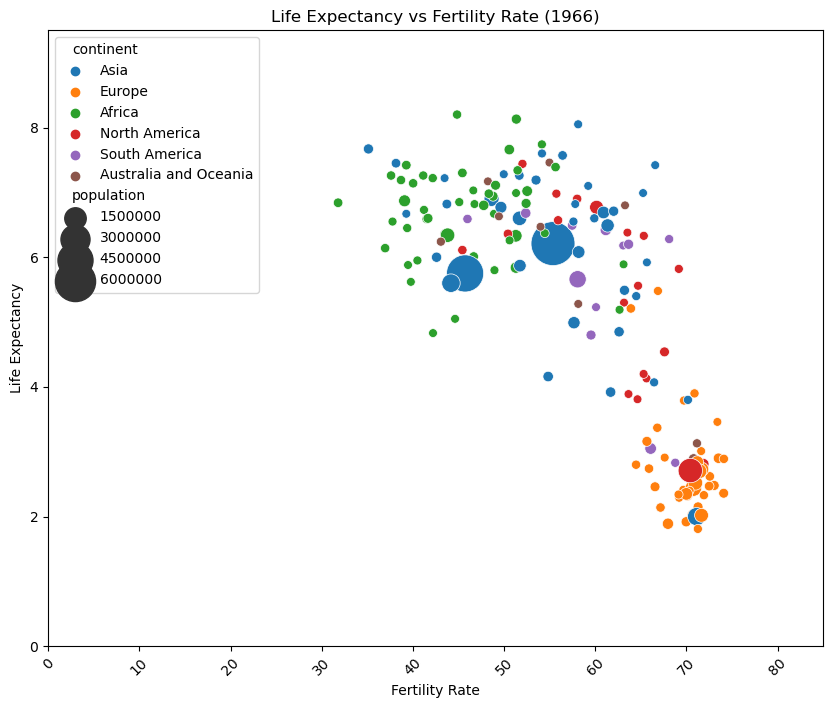

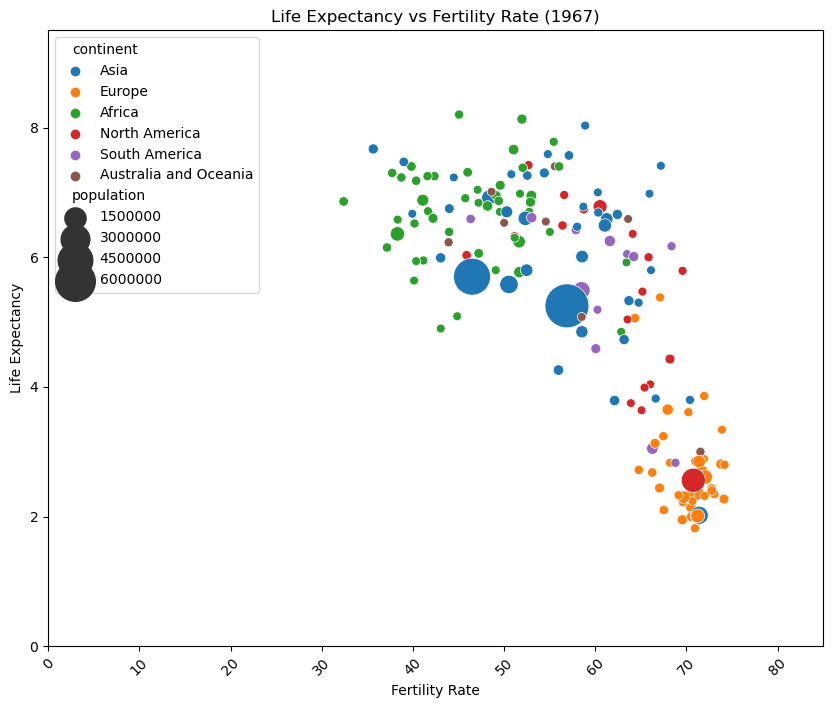

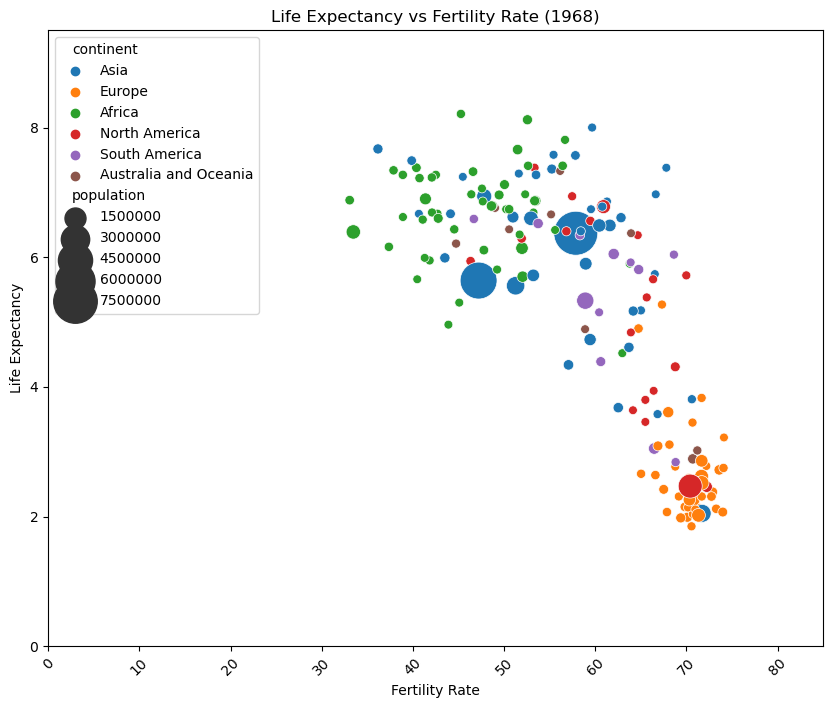

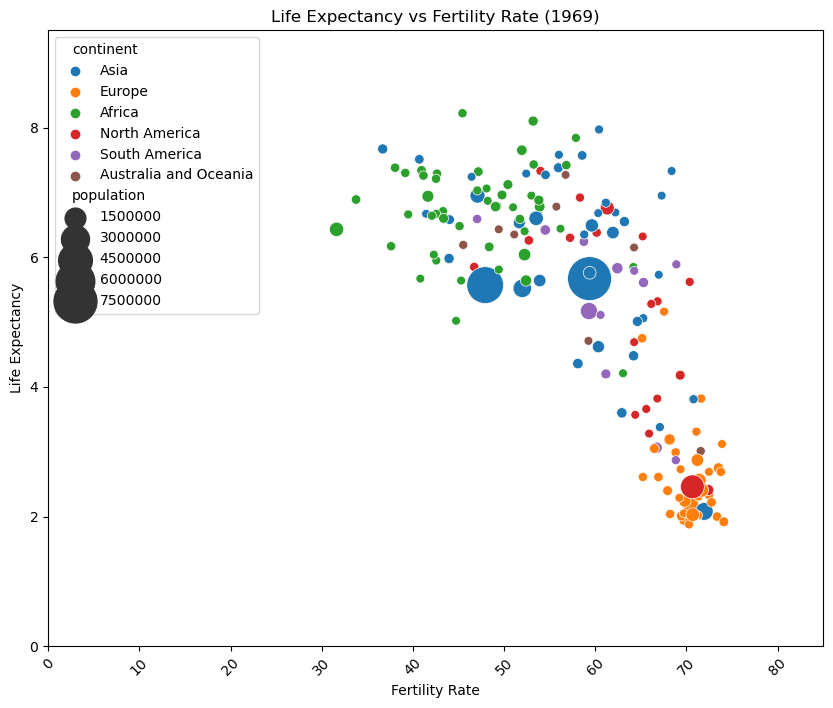

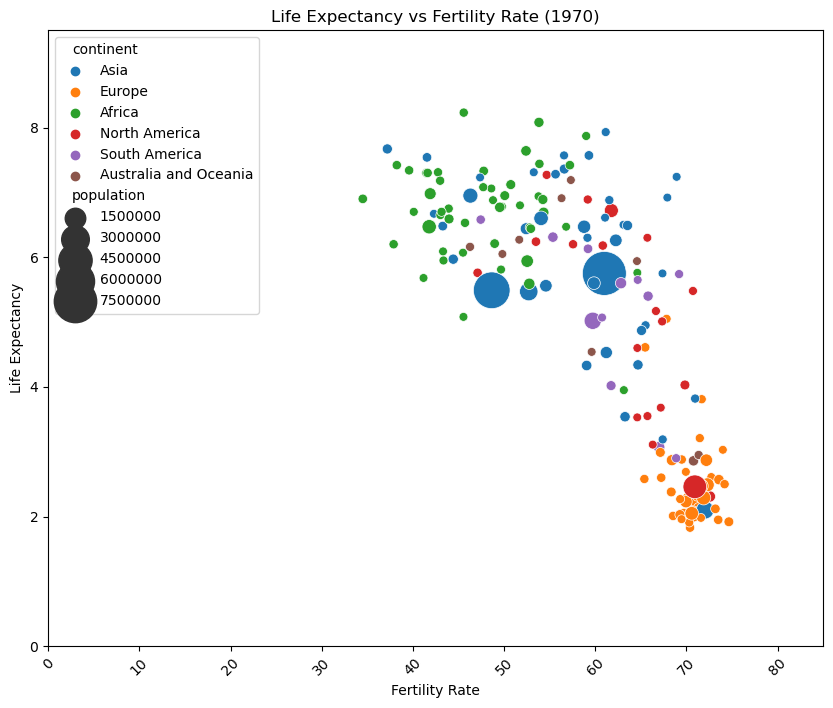

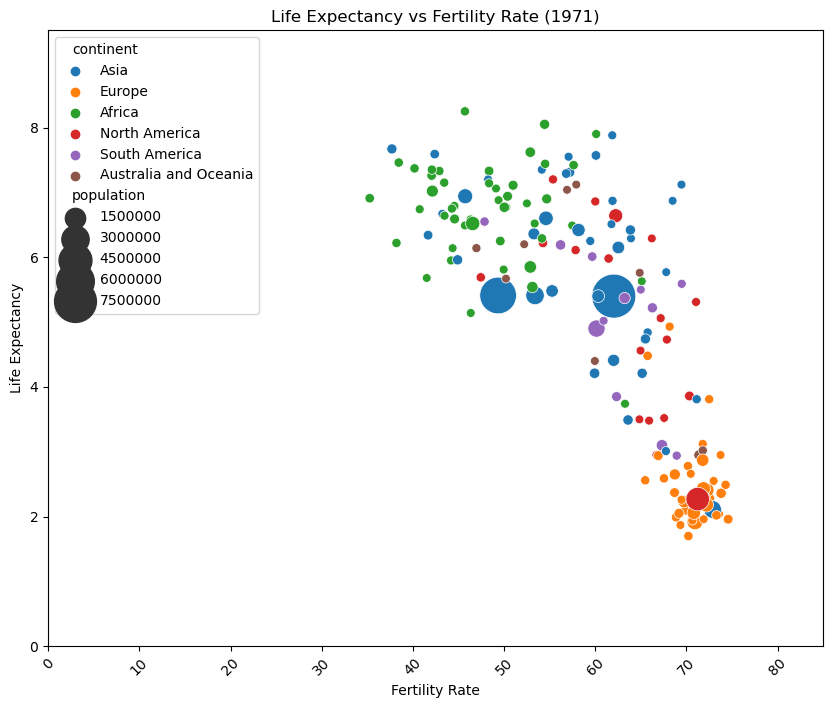

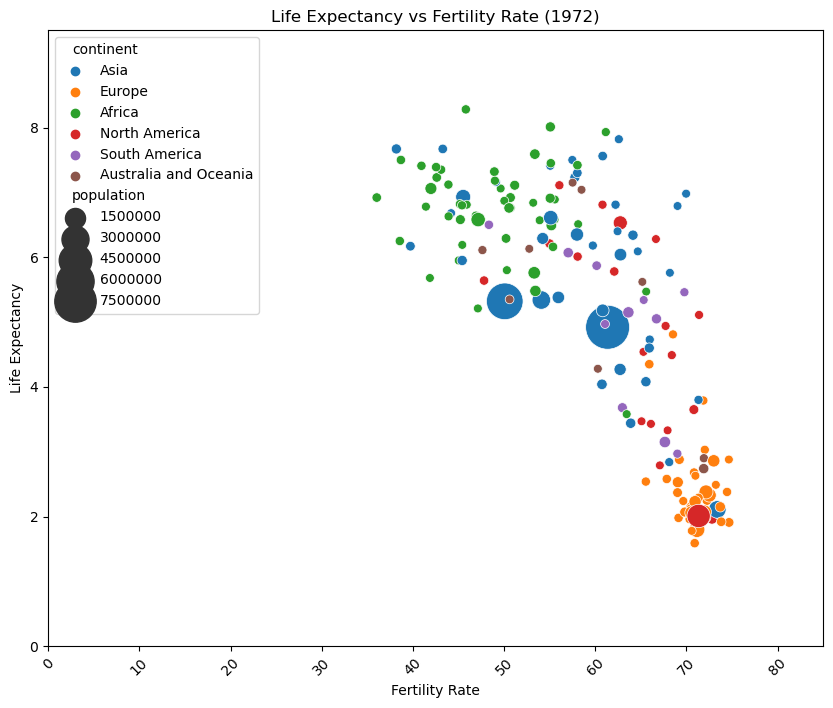

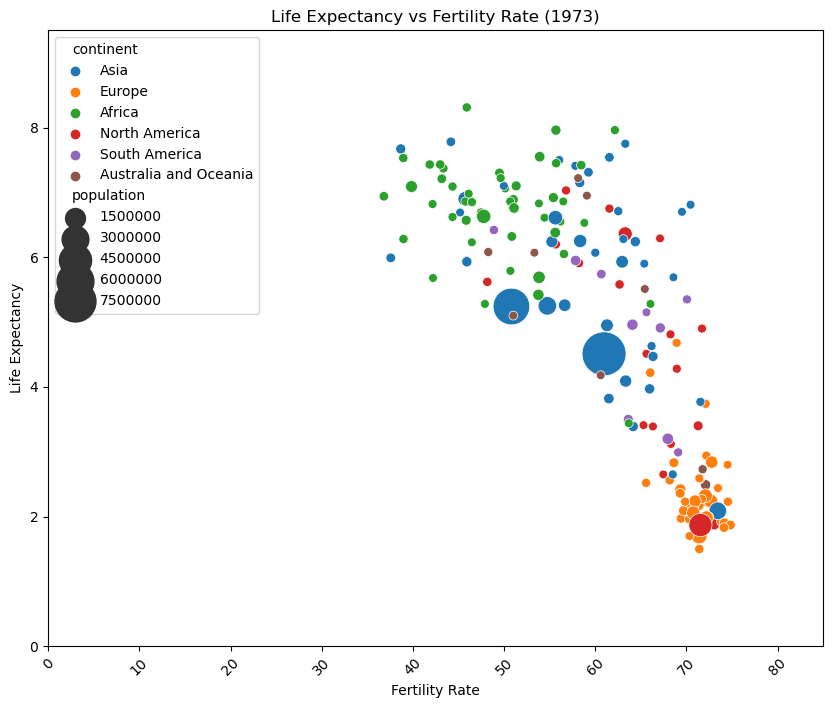

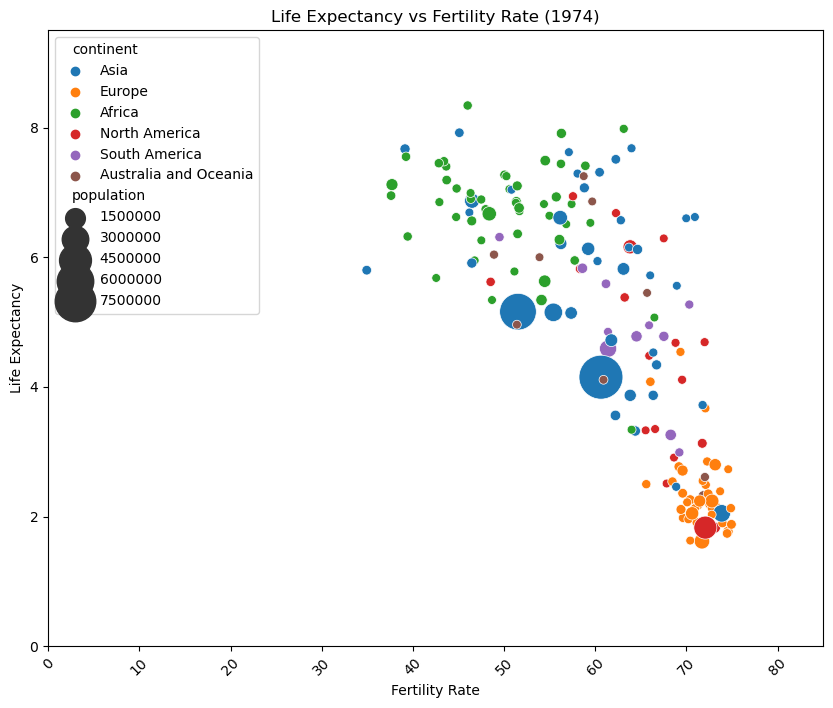

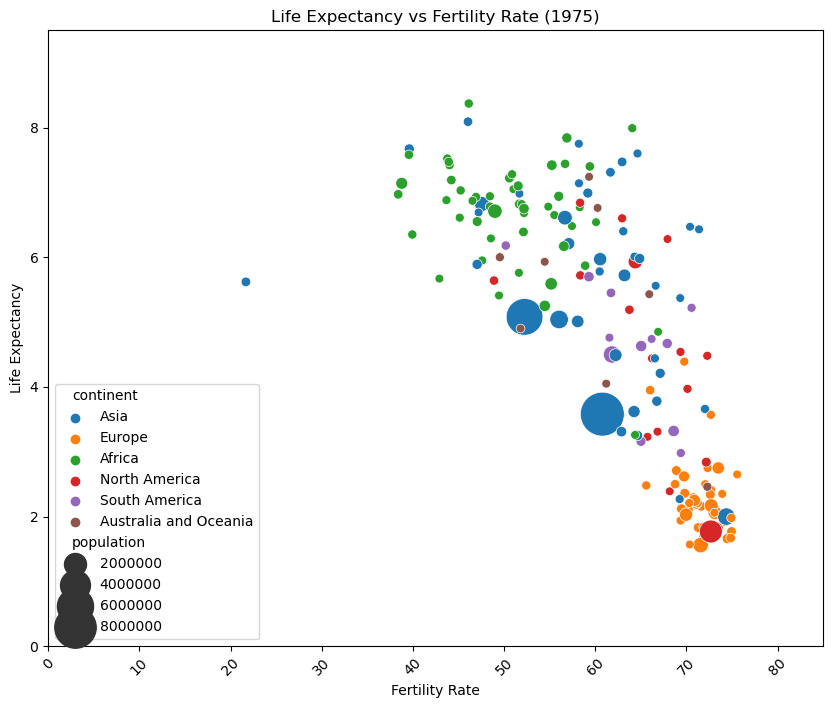

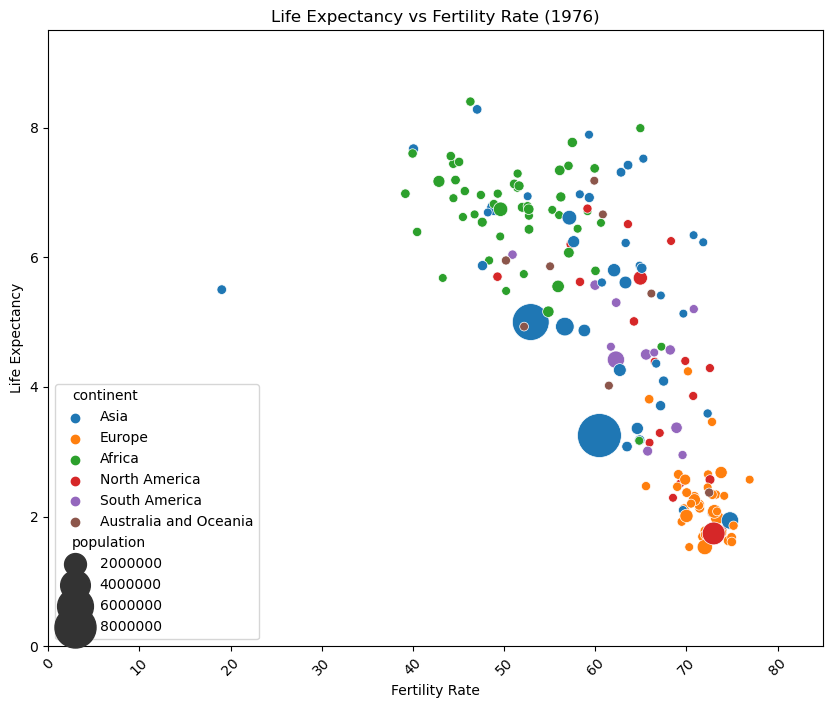

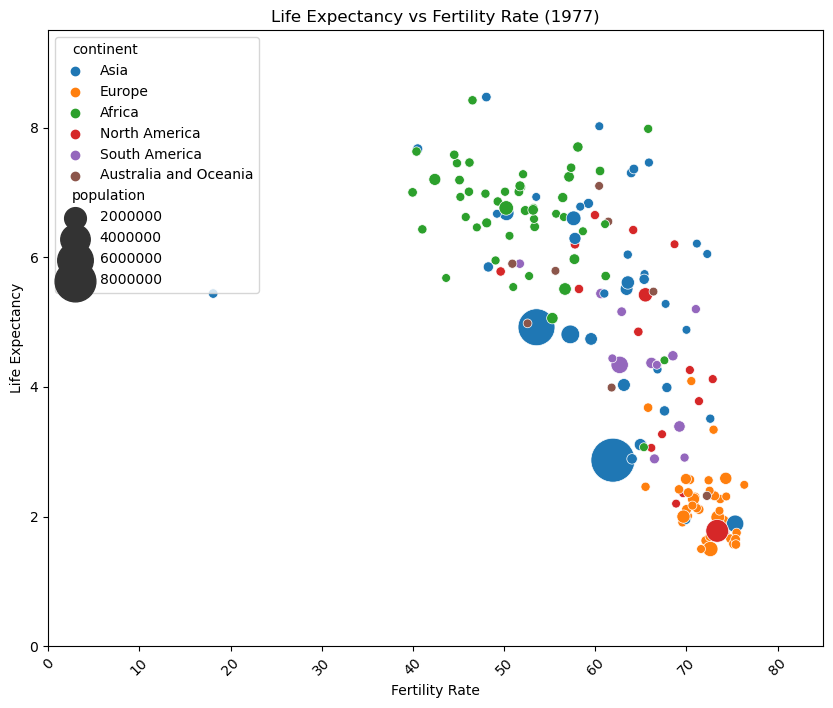

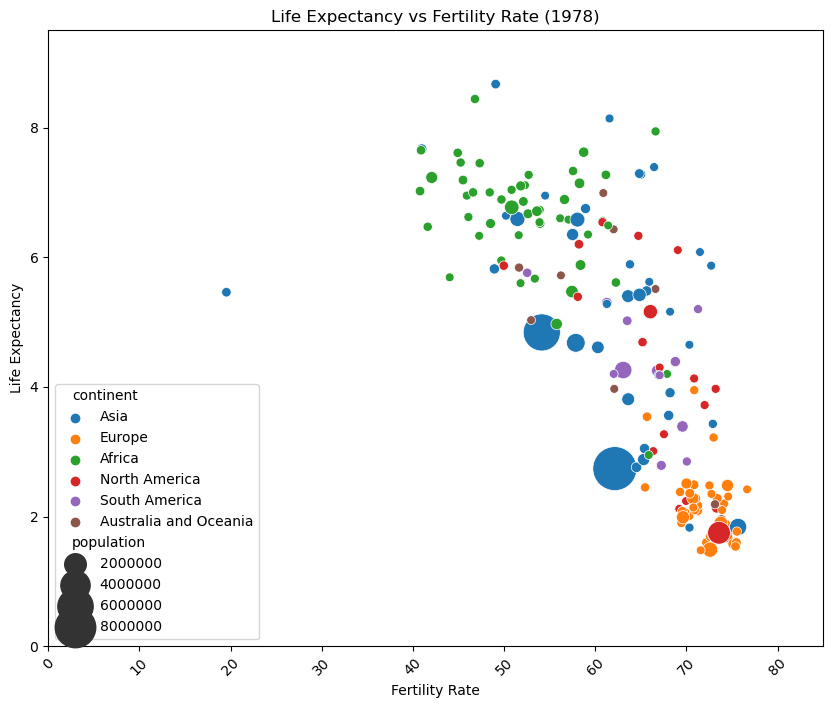

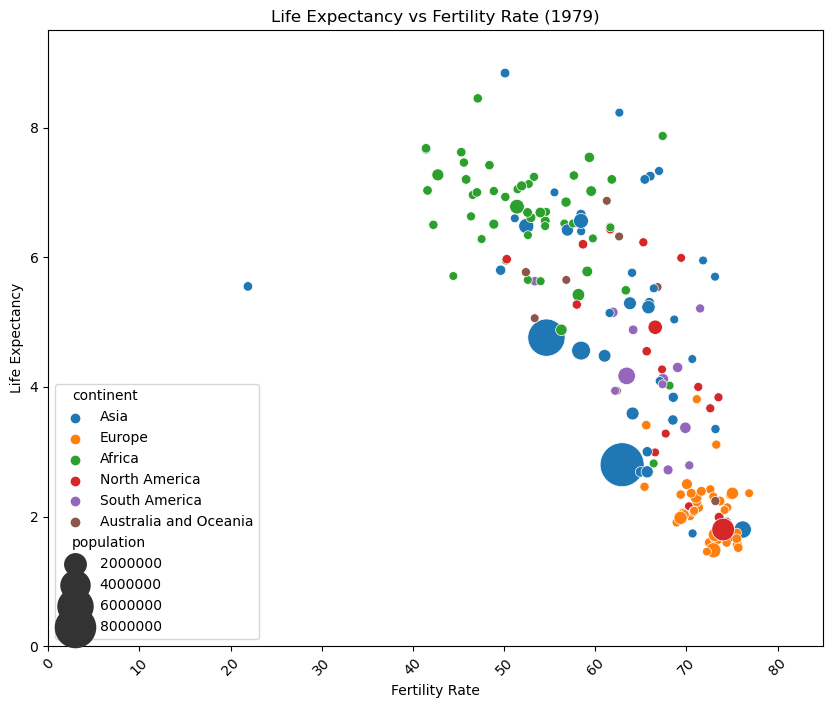

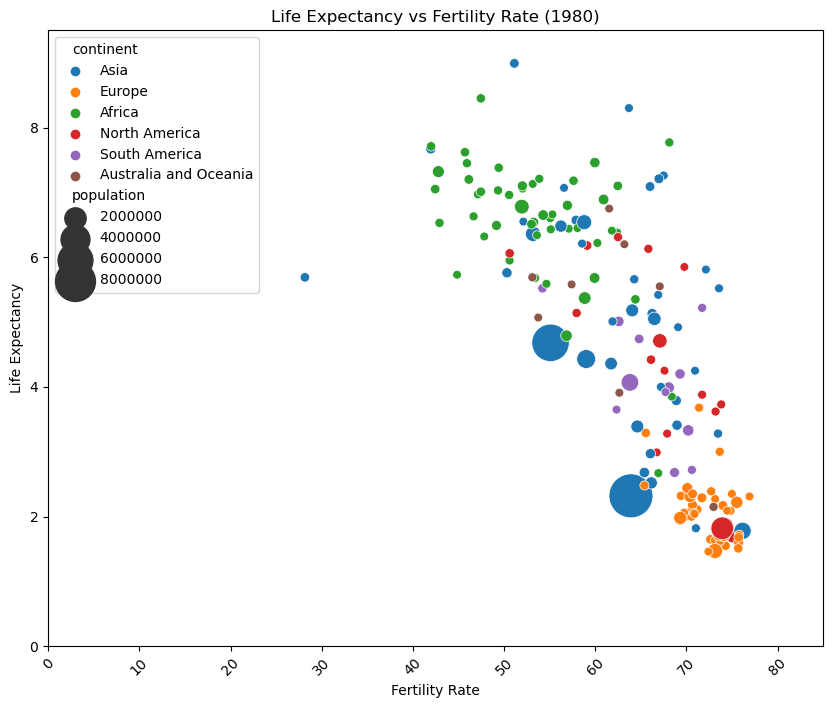

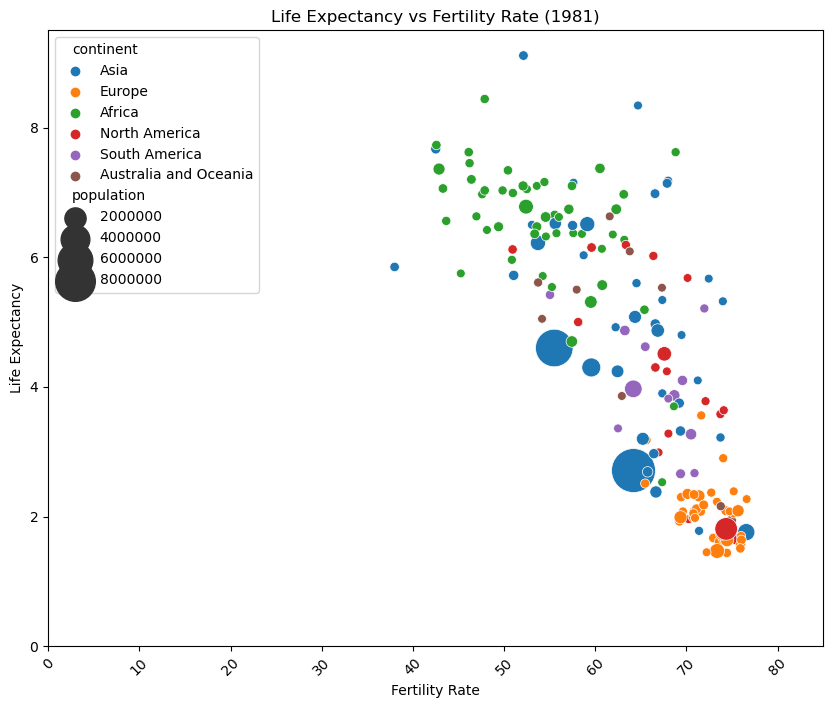

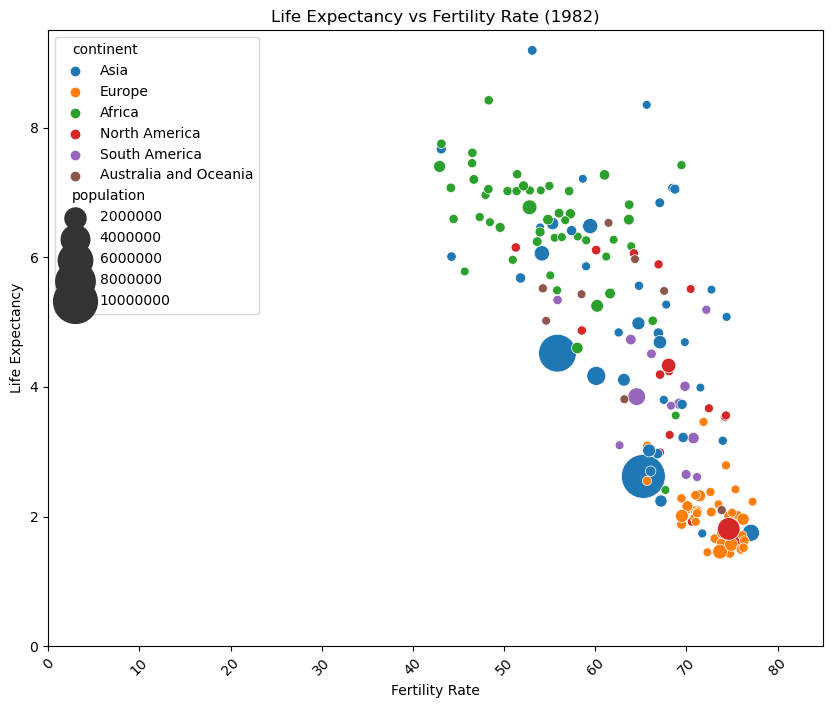

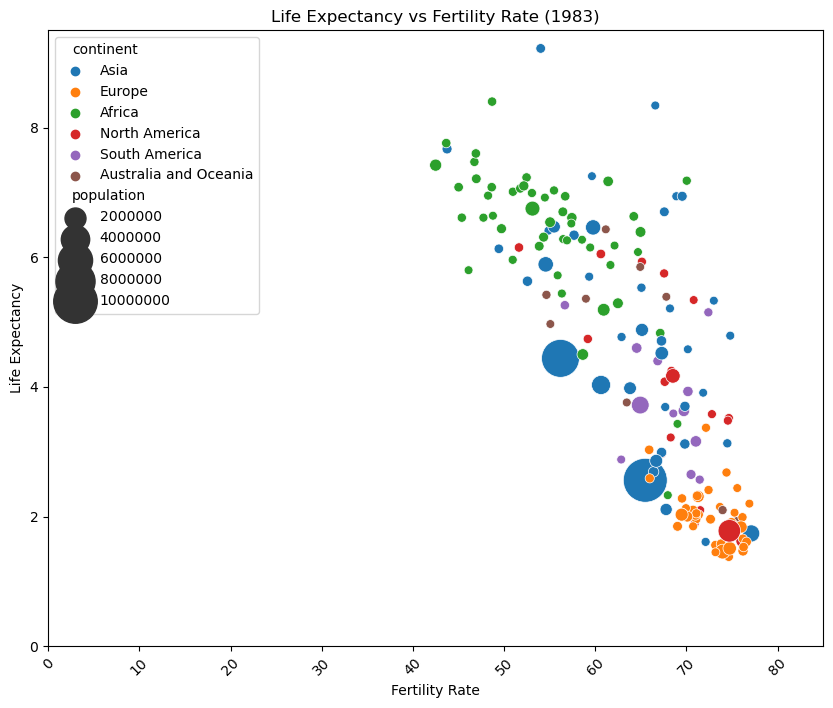

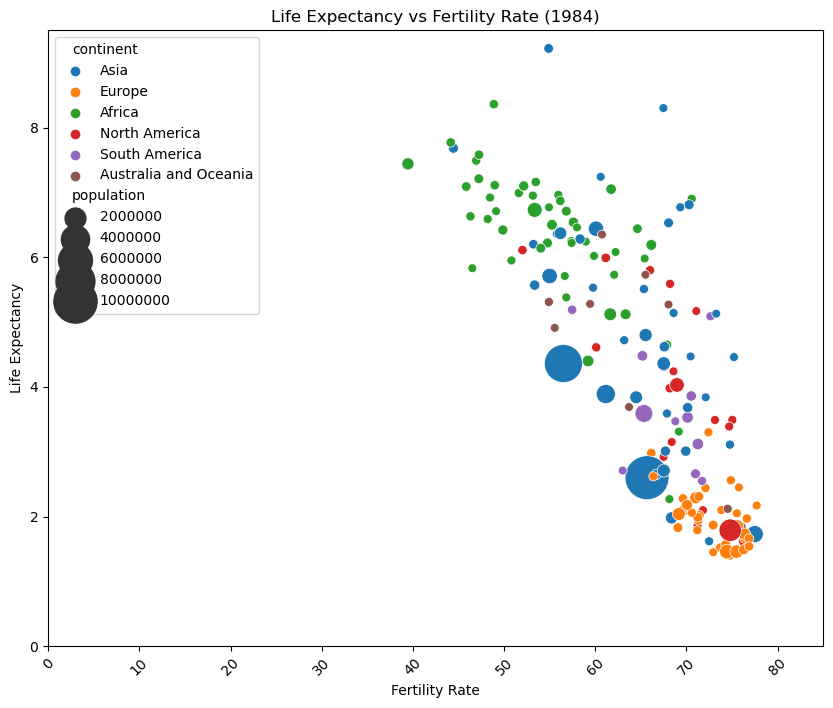

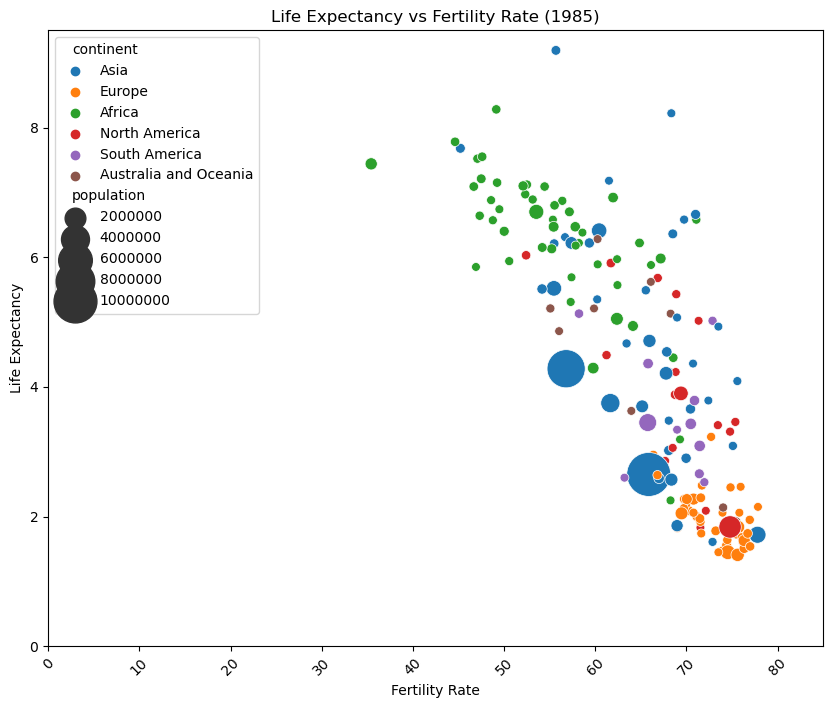

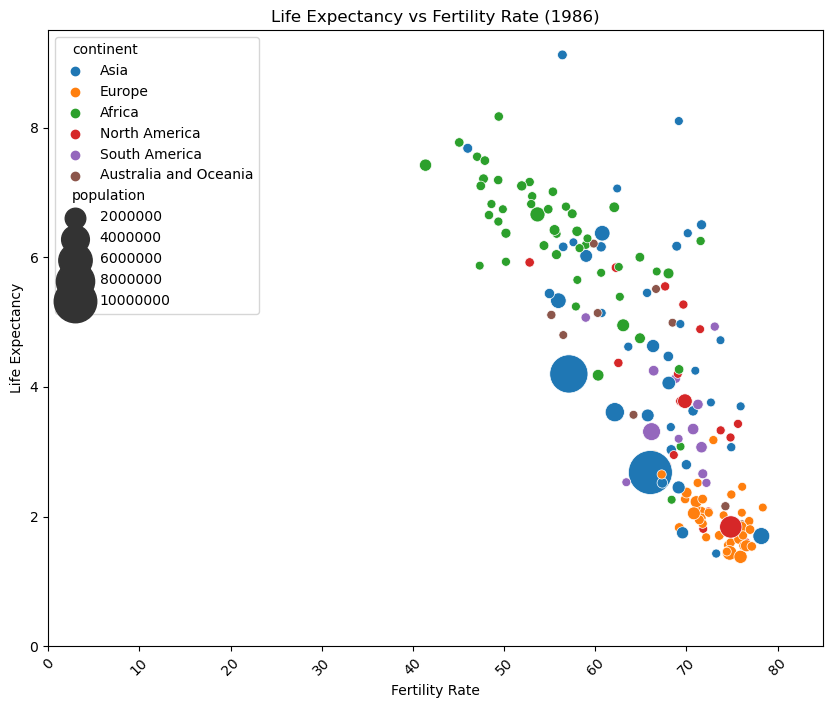

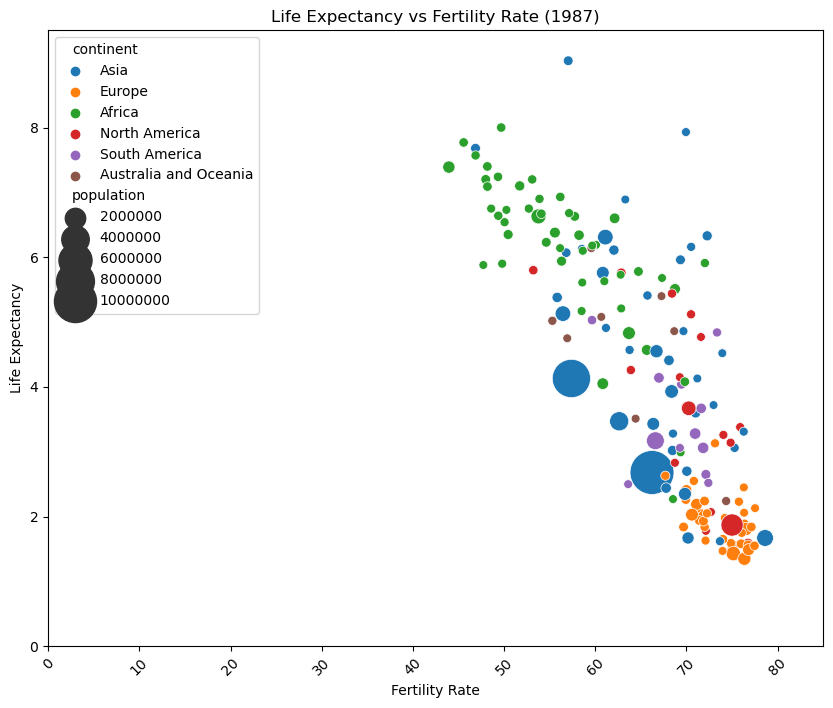

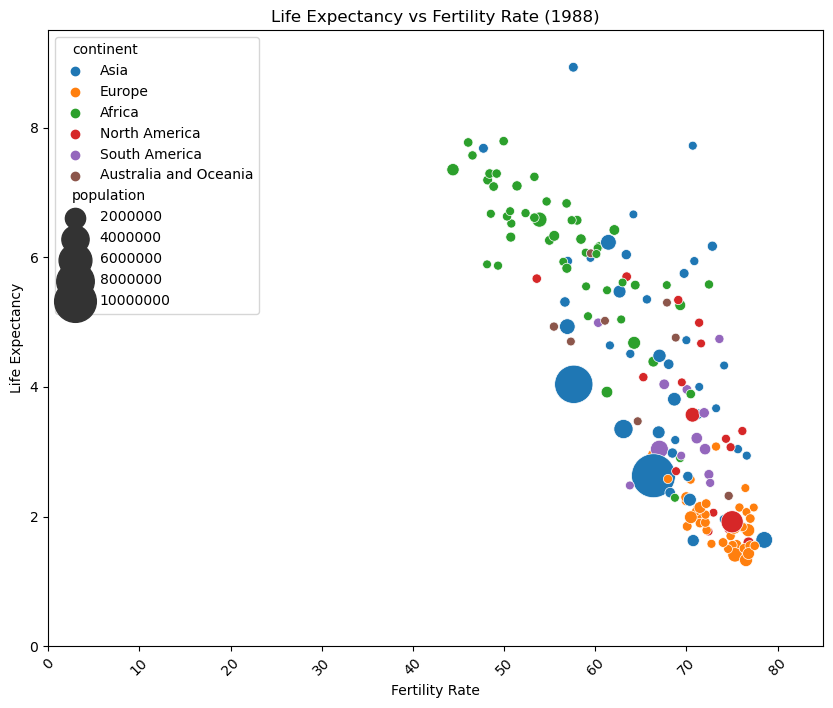

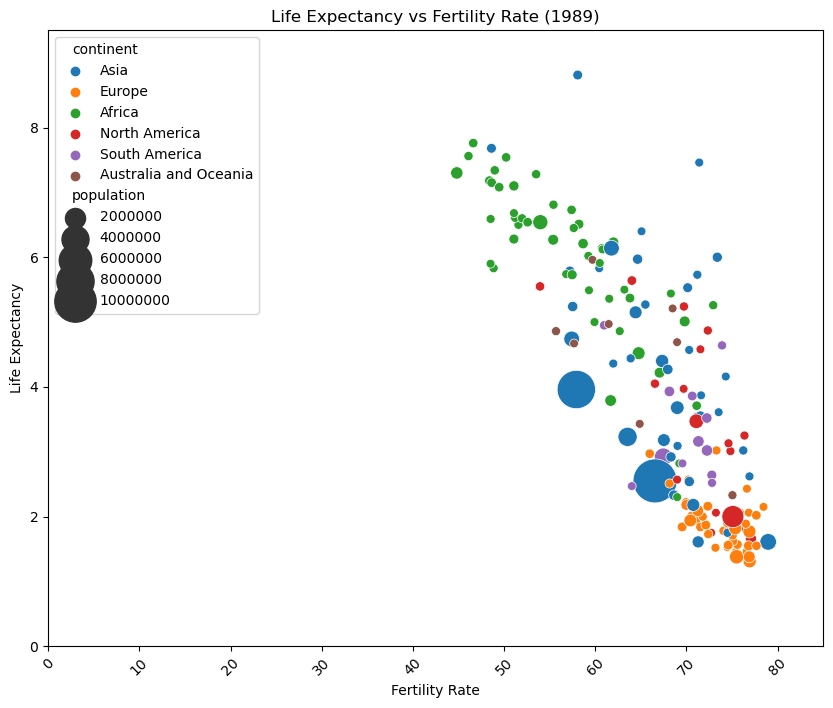

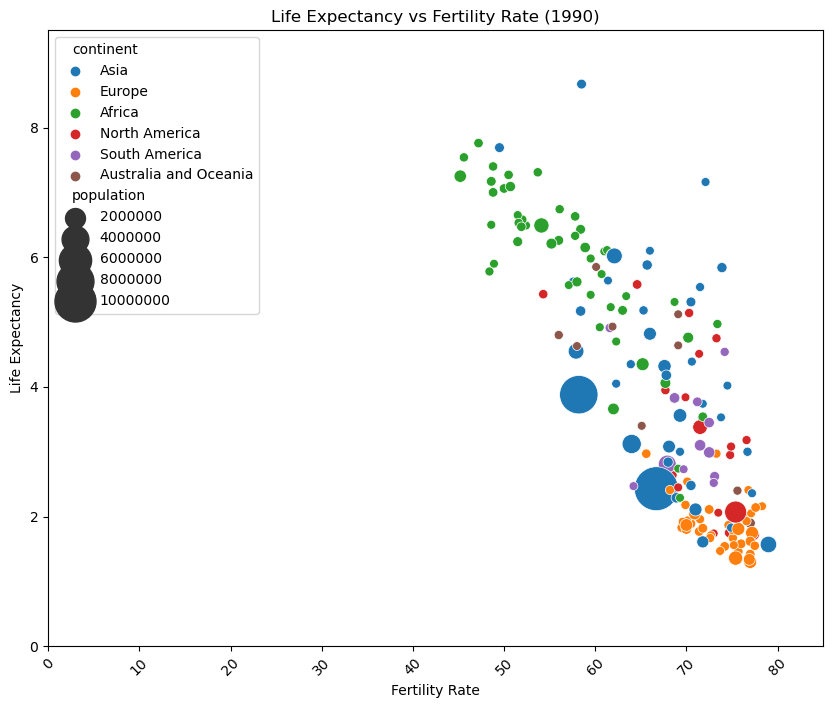

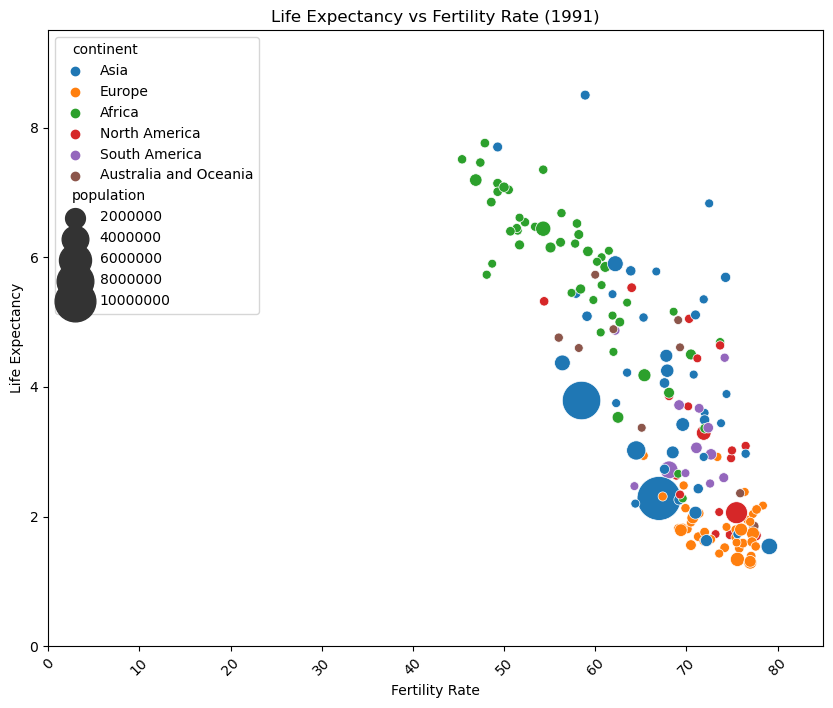

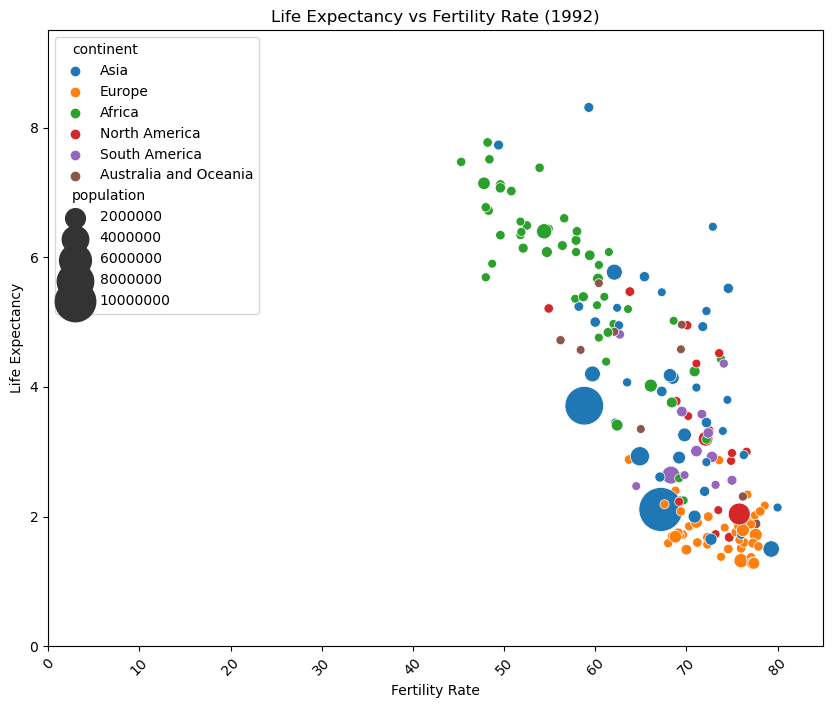

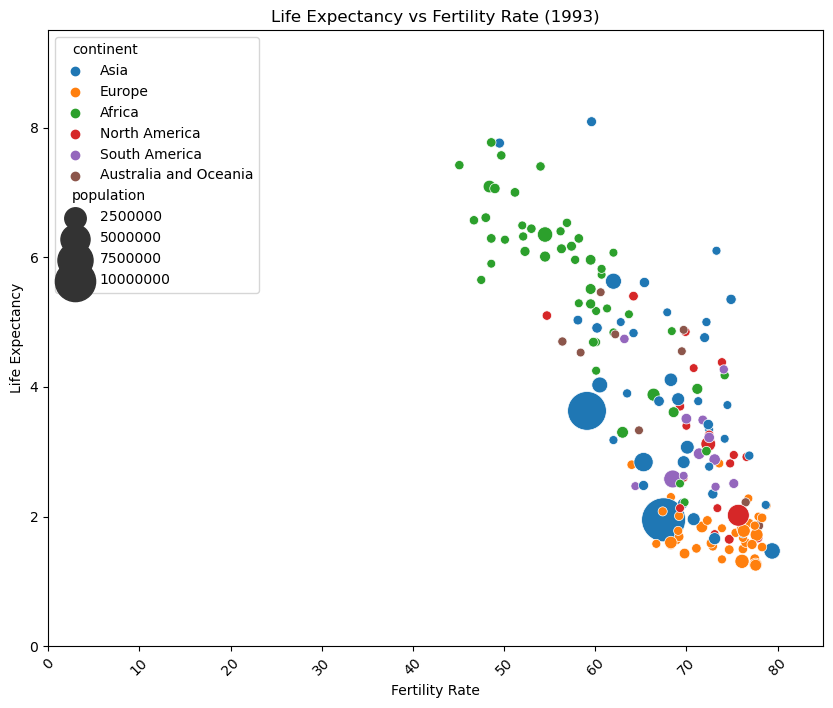

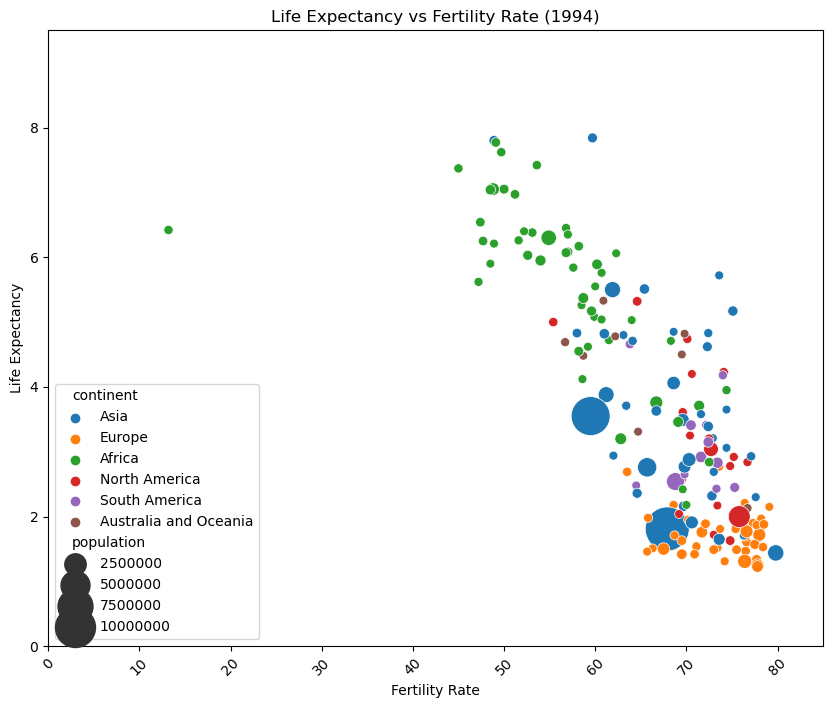

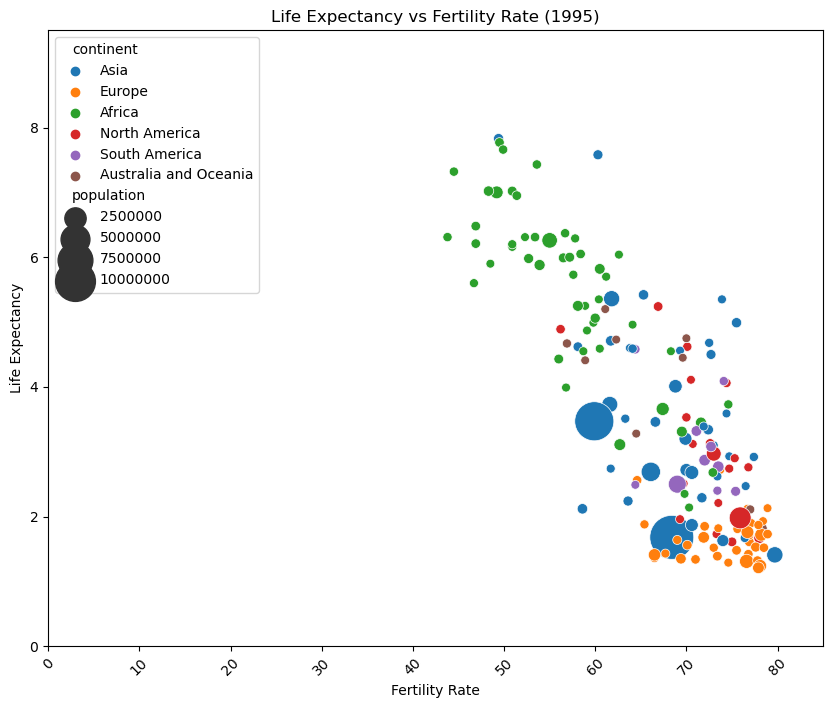

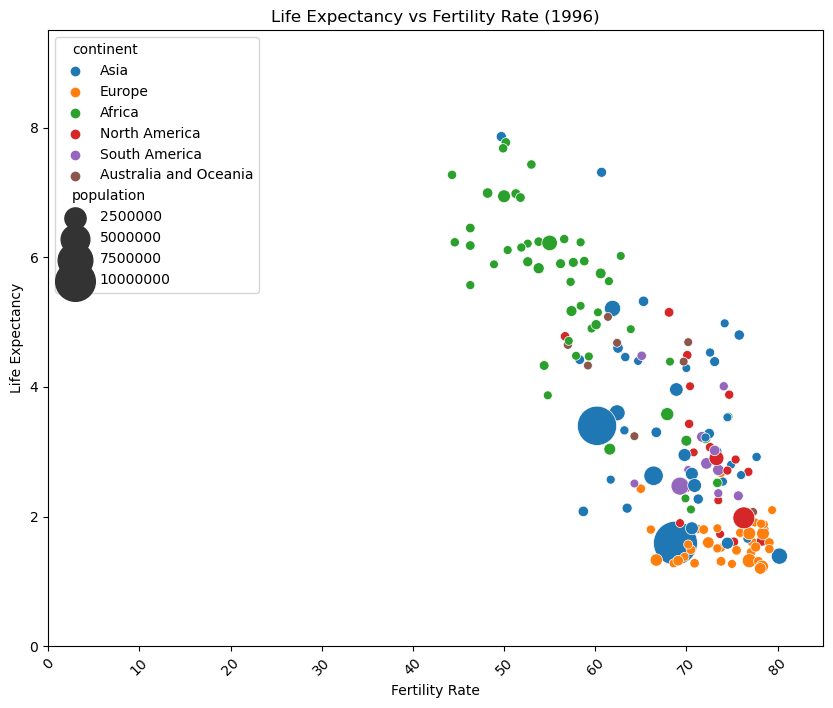

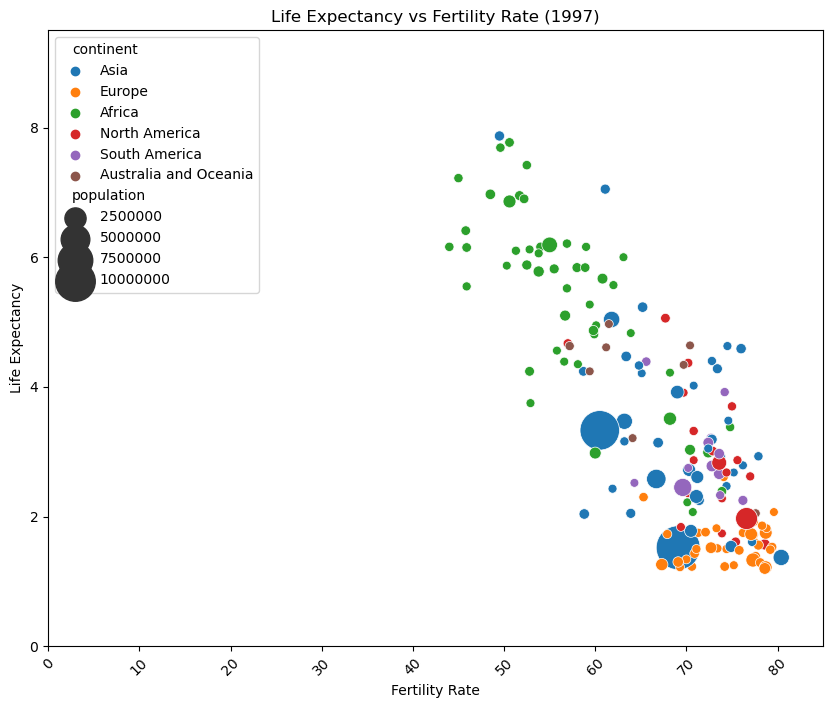

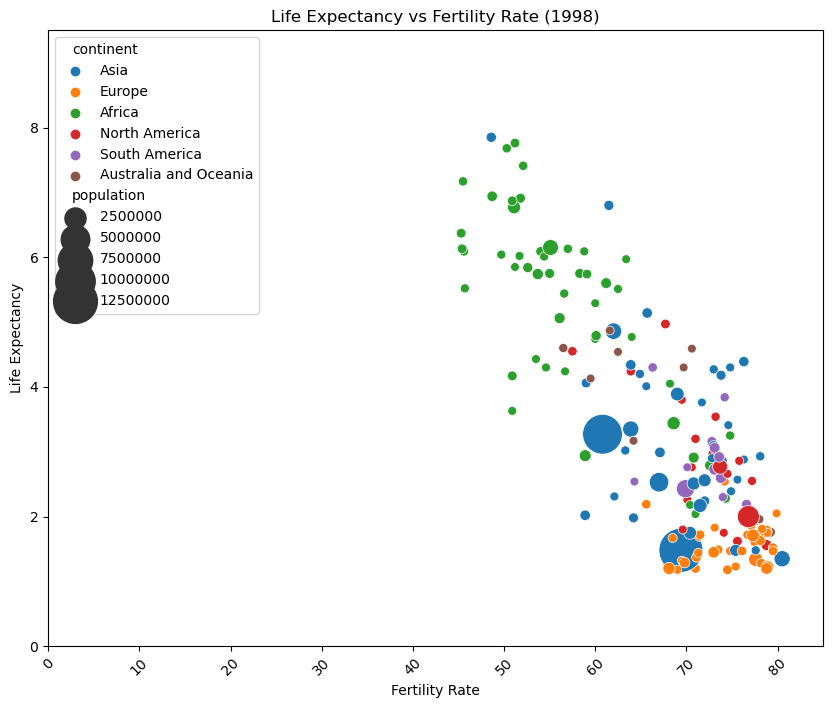

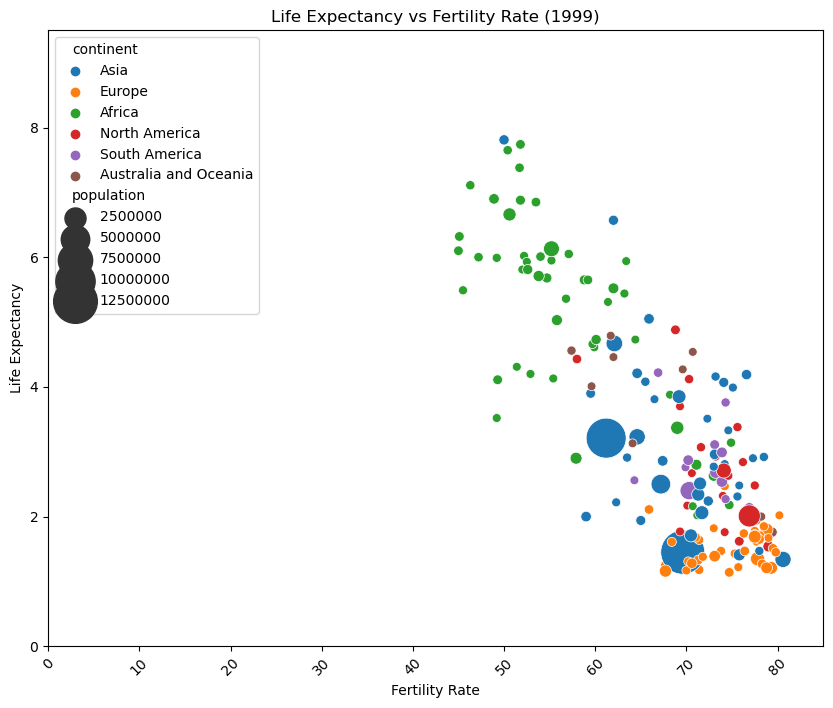

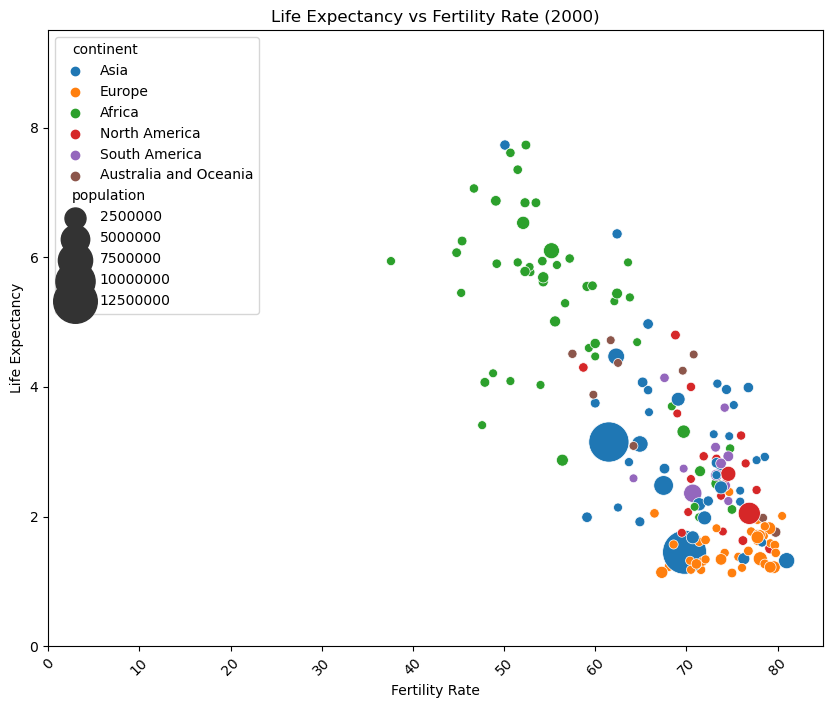

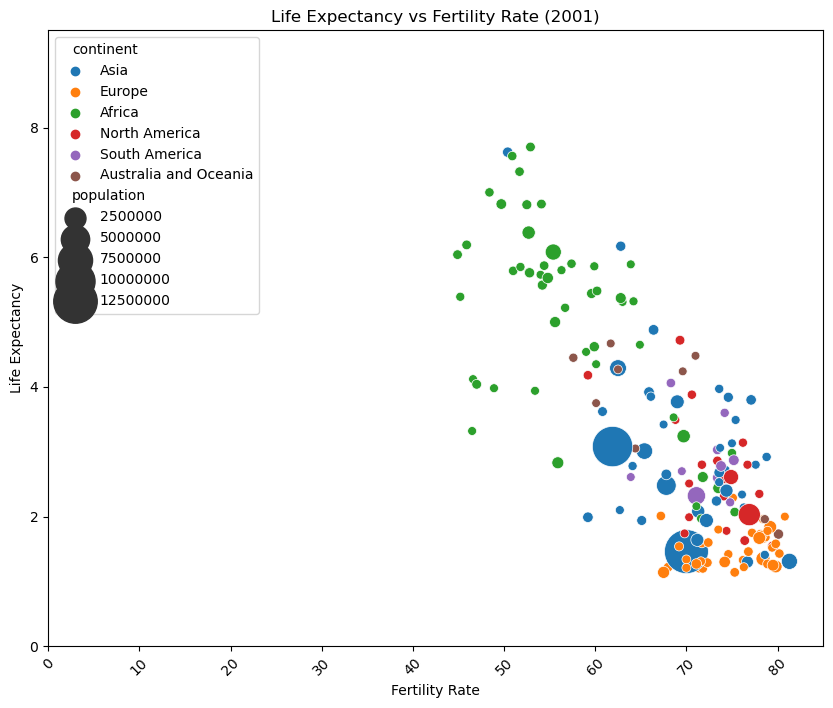

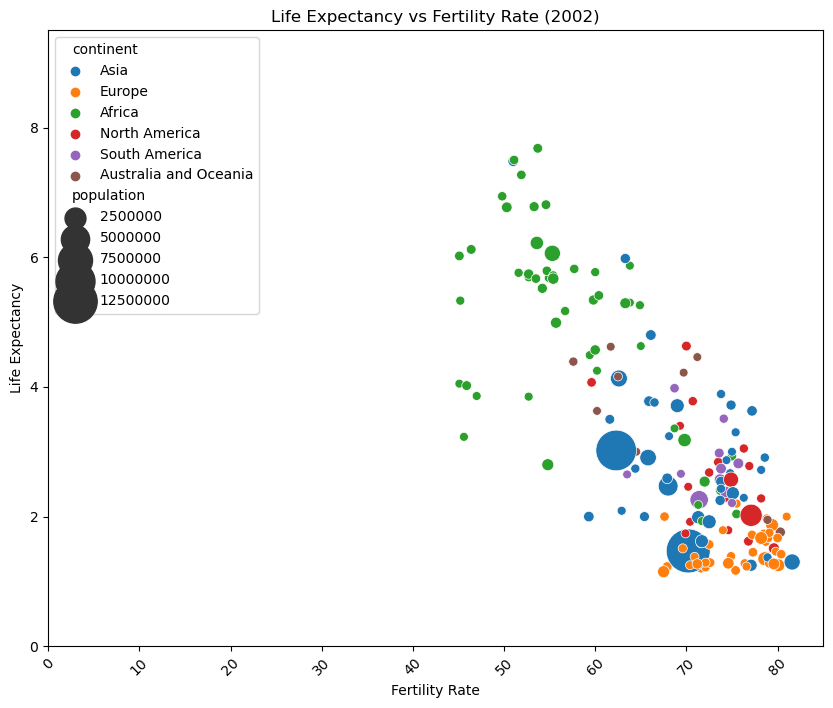

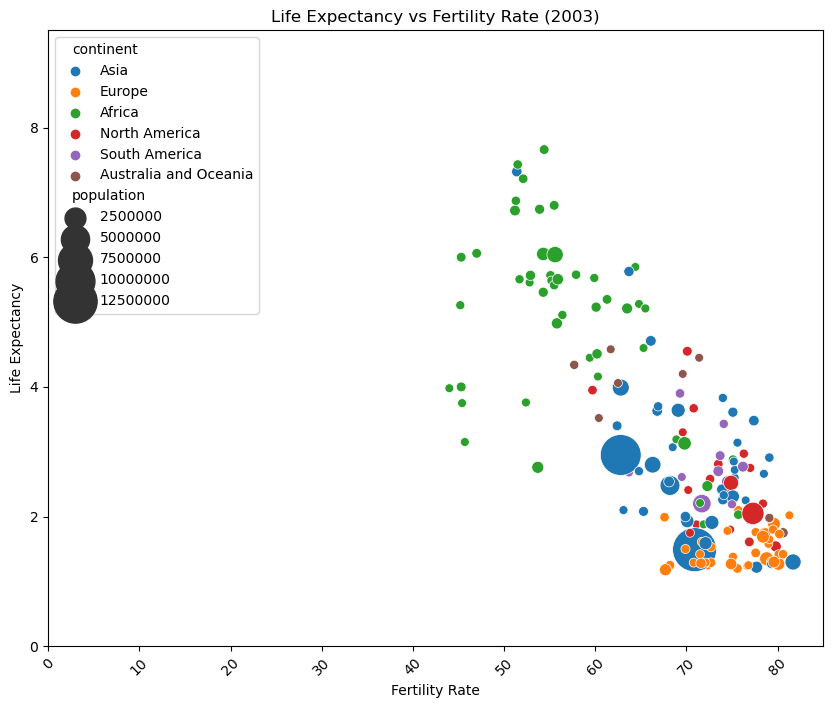

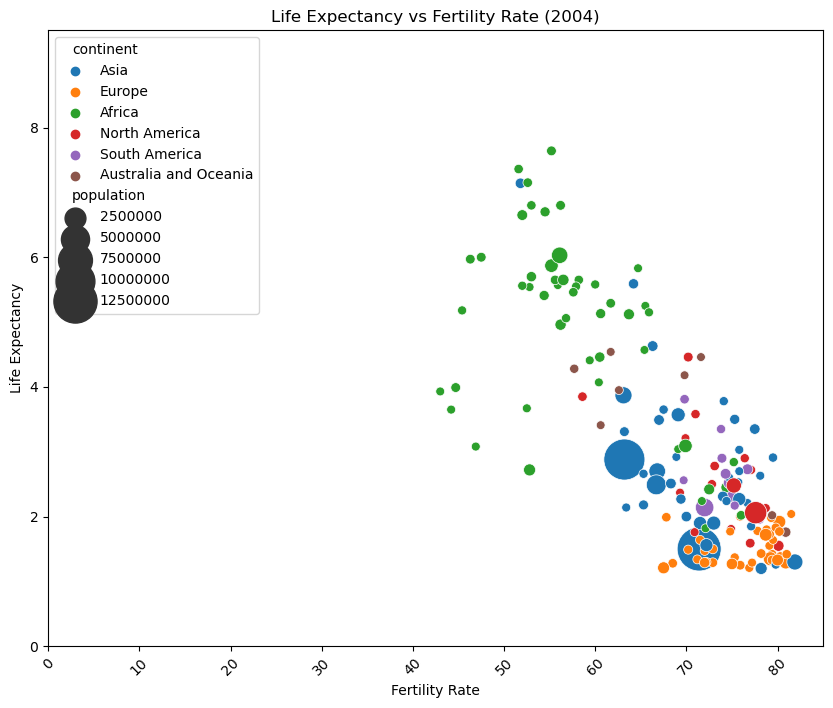

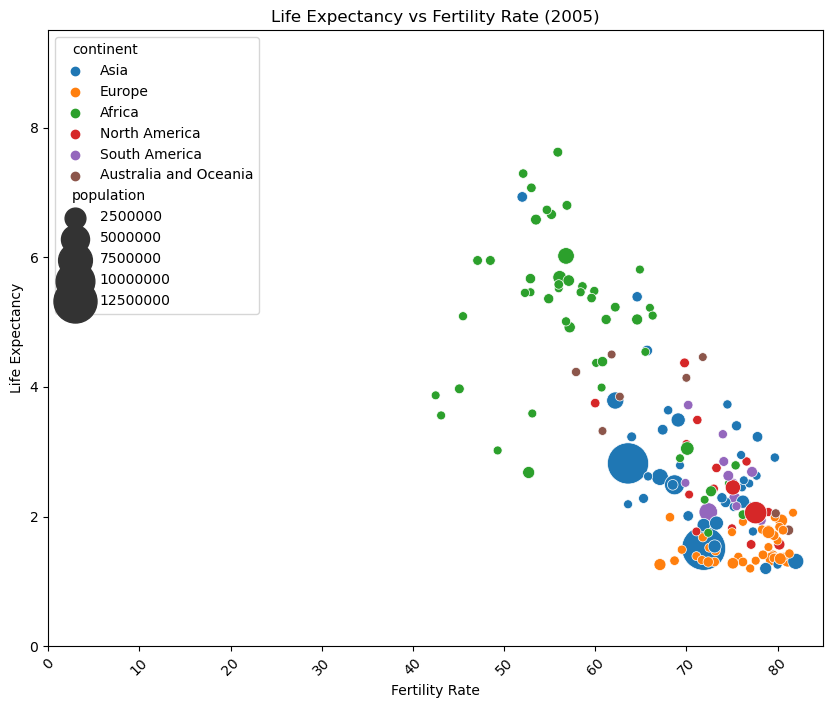

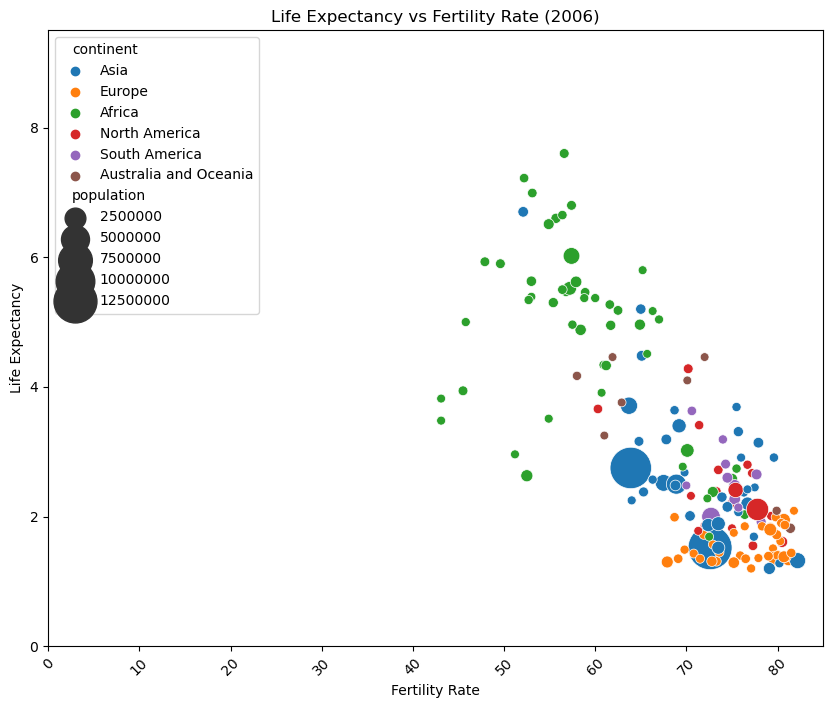

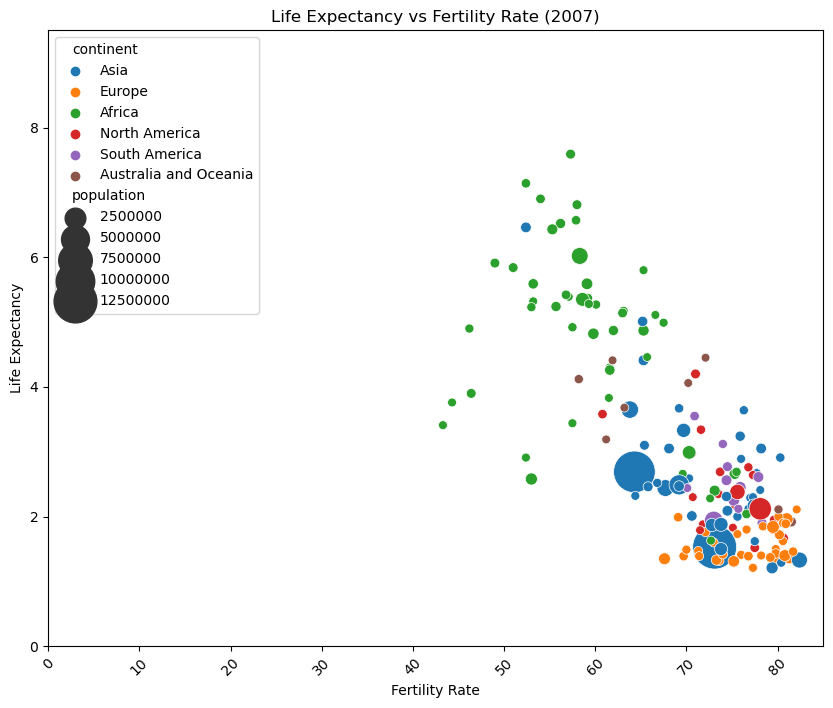

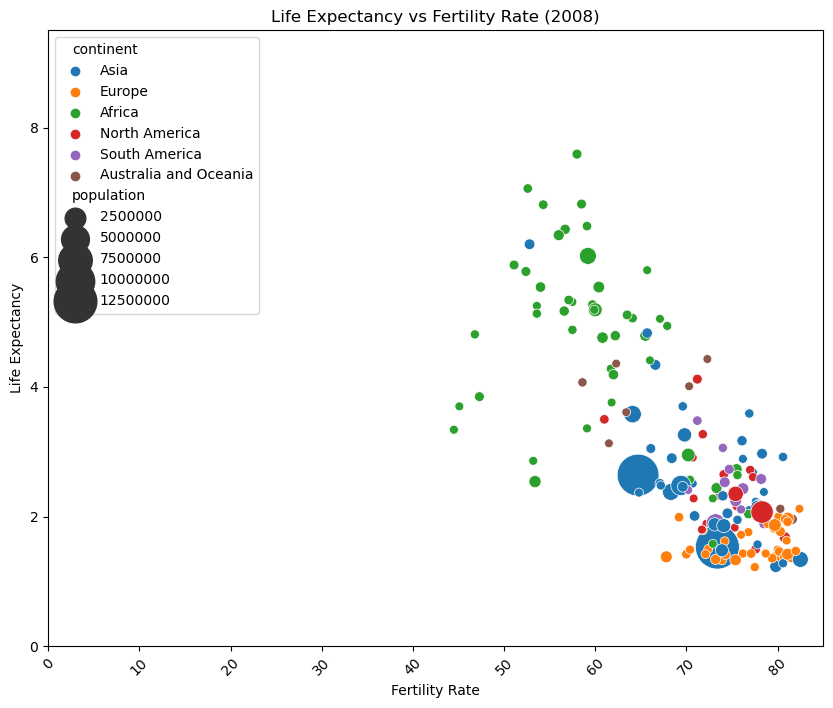

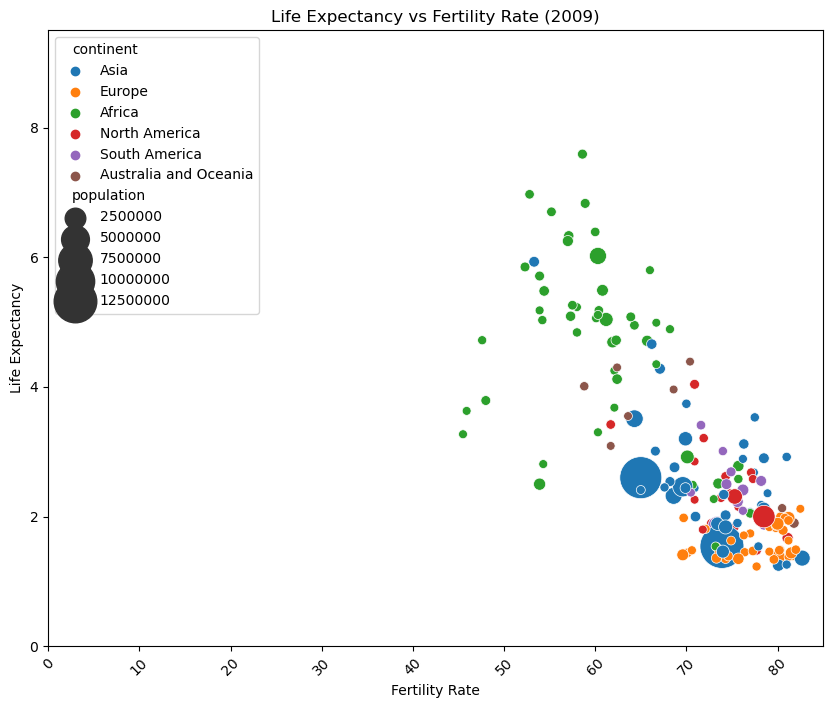

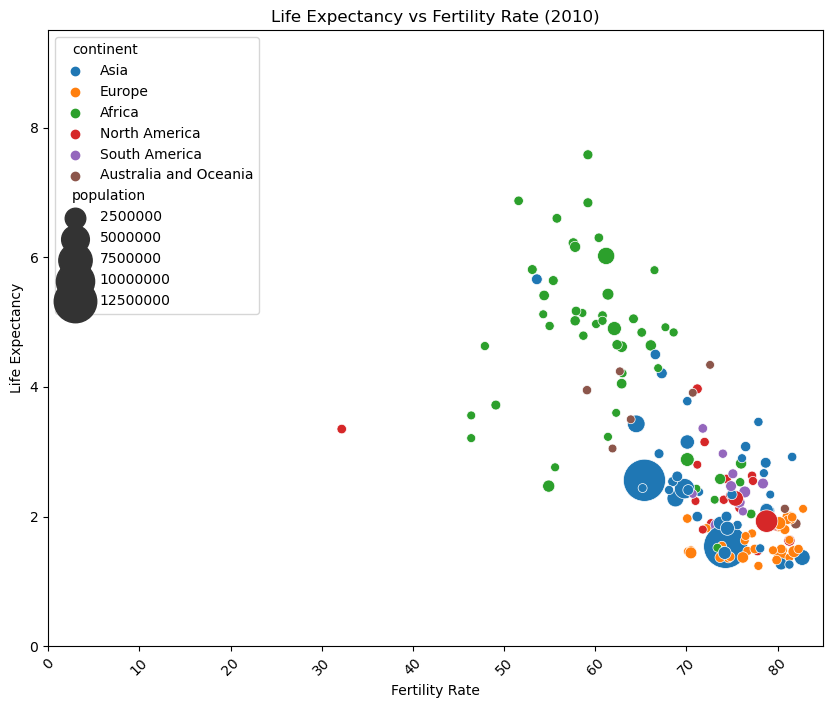

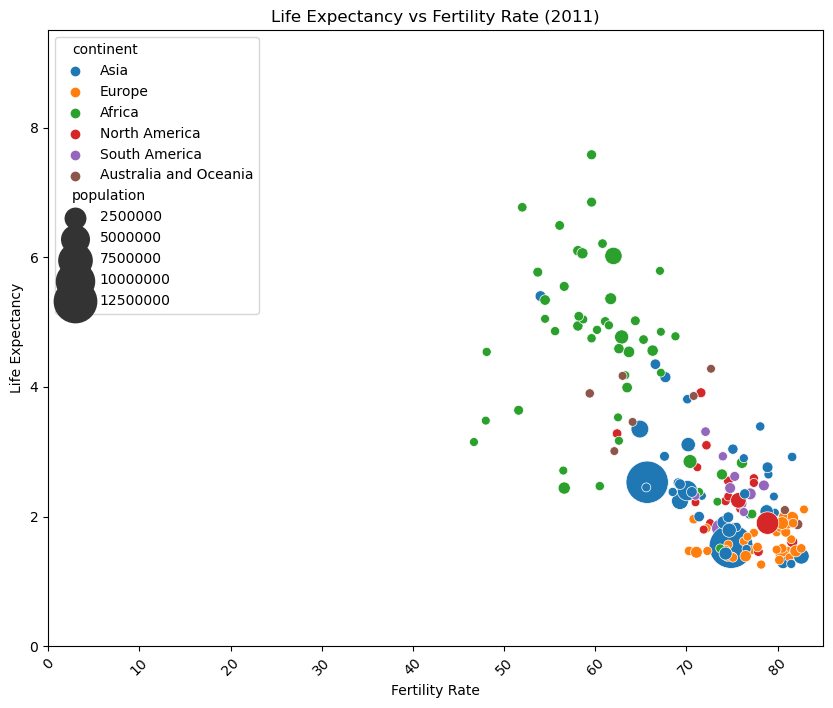

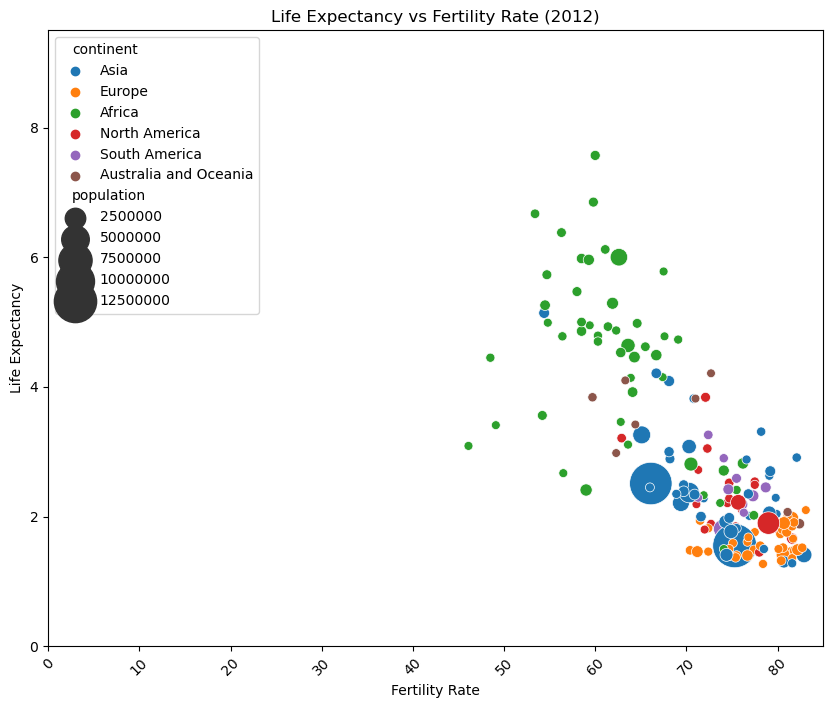

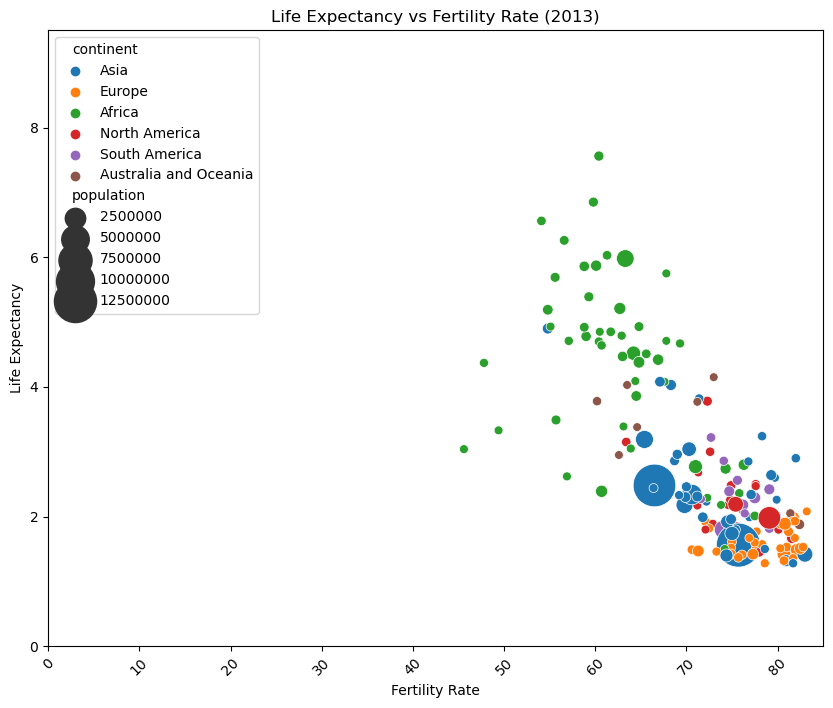

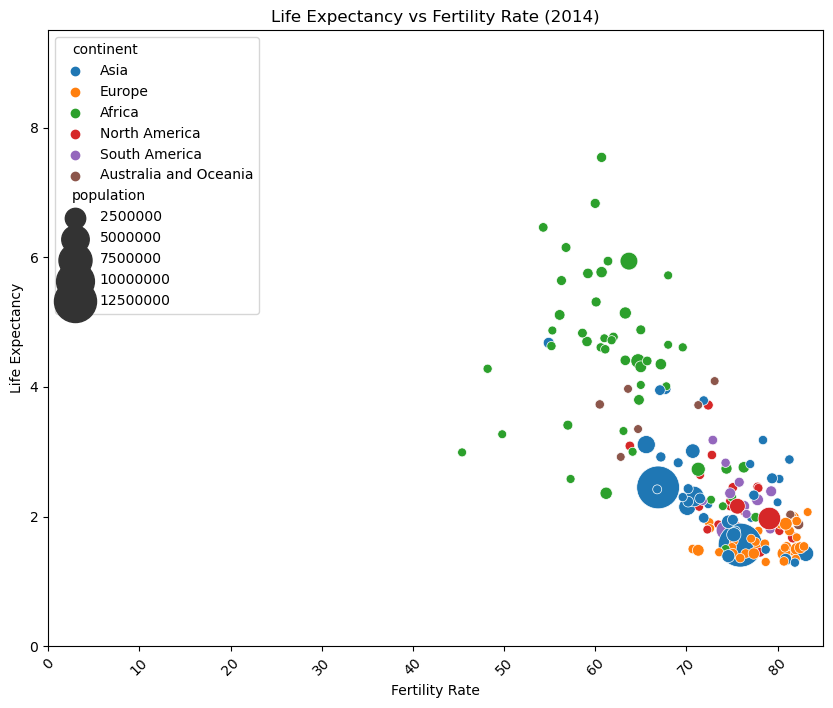

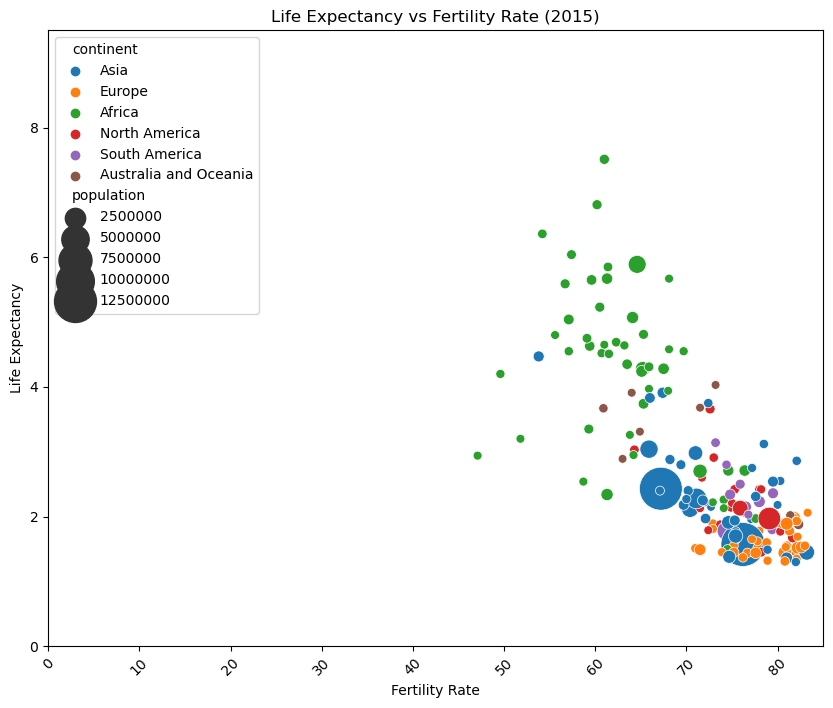

In [8]:
height = 10
width = 8

# Iterate through each year from 1960 to 2015
for year in range(1960, 2016):
    # Filter the dataframe for the current year
    this = data[data["year"] == year]
    
    # Calculate the population size for plotting
    christy = this["population"] / 100
    
    # Create the scatter plot for the current year
    plt.figure(figsize=(height, width))
    sns.scatterplot(x='life_expectancy', y='fertility', hue='continent', size=christy,
                    data=this, sizes=(40, 1000))
    plt.title(f'Life Expectancy vs Fertility Rate ({year})')
    plt.ylabel("Life Expectancy")
    plt.xlabel("Fertility Rate")
    plt.xticks(rotation=45)
    plt.axis([0, 85, 0, 9.5])
    plt.show()

In [13]:
import os

# Create a directory to save the scatterplot files
if not os.path.exists("scatterplots"):
    os.makedirs("scatterplots")

height = 10
width = 8

# Iterate through each year from 1960 to 2015
for year in range(1960, 2016):
    # Filter the dataframe for the current year
    this = data[data["year"] == year]
    
    # Calculate the population size for plotting
    christy = this["population"] / 100
    
    # Create the scatter plot for the current year
    plt.figure(figsize=(height, width))
    sns.scatterplot(x='life_expectancy', y='fertility', hue='continent', size=christy,
                    data=this, sizes=(40, 1000))
    plt.title(f'Life Expectancy vs Fertility Rate ({year})')
    plt.ylabel("Life Expectancy")
    plt.xlabel("Fertility Rate")
    plt.axis([0, 85, 0, 9.5])
    
    # Save the scatterplot to a file with the year in the filename
    filename = f'scatterplots/plot_{year}.png'
    plt.savefig(filename)
    
    # Close the current figure to free up memory
    plt.close()

In [16]:
import imageio


images = []

# Directory path where scatterplot files are saved
directory = "scatterplots"

# Iterate through each year
for year in range(1960, 2016):
    # Create the filename for the scatterplot image
    filename = f'plot_{year}.png'
    
    # Create the file path
    file_path = os.path.join(directory, filename)
    
    # Read the image and append it to the images list
    images.append(imageio.imread(file_path))

# Specify the output GIF file path and save the GIF
output_file = "scatterplots.gif"
imageio.mimsave(output_file, images, fps=20)

/var/folders/kq/06c2srv963j0pl9s_r6r7_q40000gn/T/ipykernel_45263/1875302140.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


In [ ]:
"\